In [1]:
#explore different features for conversation booking rate prediction
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pylab as pl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import analytics_lib
from analytics_lib import Bucket_BR_Plot
from analytics_lib.add_column import add_column
import modeldata
from modeldata.importdata import *
from analytics_lib.GenerateCBRCI import GenerateCBRCI
from analytics_lib.EvalLRModel import EvalLRModel
from analytics_lib.get_training_conversation import get_training_conversation
from analytics_lib.model_display_suite import display_model_coef
from analytics_lib.Bucket_BR_Plot import Bucket_BR_Plot
plt.style.use('seaborn')

In [2]:
data_dir = '/Users/wendyshi/Development/Post_DV_Data'
reset_switch = True
slug = 'dog-walking'
date_stamp = '2017-07-01'

## Read in data

In [3]:
feature_df_fn = os.path.join(data_dir,'DB_training_post_'+date_stamp+'.csv')
sitter_global_training = pd.read_csv(feature_df_fn)

In [4]:
ob = get_training_conversation(sitter_global_training,exclude=False,service=slug)

In [5]:
list(ob)

['Unnamed: 0',
 'conversation_id',
 'conversation_added',
 'provider_id',
 'service_type',
 'is_repeat_customer',
 'requester_was_new_customer',
 'ignore_from_search_reason',
 'convo_is_premier',
 'booked',
 'need_booked',
 'came_from_search',
 'provider_type',
 'id',
 'added',
 'modified',
 'signup_reason',
 'expected_earnings',
 'available_all_days',
 'rover_training',
 'lessonly_training',
 'background_check_taken',
 'has_insurance',
 'is_premier',
 'num_testimonials',
 'relative_price',
 'profile_quality',
 'facebook_connected',
 'num_pets',
 'flexible_availability',
 'spaces_available',
 'small_dogs',
 'medium_dogs',
 'large_dogs',
 'giant_dogs',
 'dogs_experience_len',
 'description_len',
 'num_images',
 'avg_testimonial_len',
 'avg_image_resolution',
 'gender',
 'years_of_experience',
 'donation',
 'app_downloaded',
 'verified_by',
 'used_rover_to_find_sitter',
 'building_type',
 'yard_type',
 'inspected_home',
 'max_dogs',
 'service_id',
 'all_requests_provider',
 'all_bookings

In [8]:
ob_raw_fea = ['sitter_response_pct',
 'service_response_pct','signup_reason',
 'expected_earnings',
 'available_all_days',
 'rover_training',
 'lessonly_training',
 'background_check_taken',
 'has_insurance',
 'num_testimonials',
 'profile_quality',
 'facebook_connected',
 'num_pets',
 'spaces_available',
 'small_dogs',
 'medium_dogs',
 'large_dogs',
 'giant_dogs',
 'dogs_experience_len',
 'description_len',
 'num_images',
 'avg_testimonial_len',
 'avg_image_resolution',
 'gender',
 'years_of_experience',
 'donation',
 'app_downloaded',
 'verified_by',
 'used_rover_to_find_sitter',
 'building_type',
 'yard_type',
 'inspected_home',
 'avg_service_response_seconds',
 'avg_sitter_response_seconds',
 'first_booking',
 'second_booking',
 'third_booking',
 'first_request',
 'second_request',
 'third_request',
 'rover_imported_ratio','calendar_recency','spaces_available','provider_cbr_all','rover_imported_ratio_x_cbr','no_previous_request']

## Get basic prevalence and statistics

max_clip is 1.0


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'Feature :: sitter_response_pct_clipped'

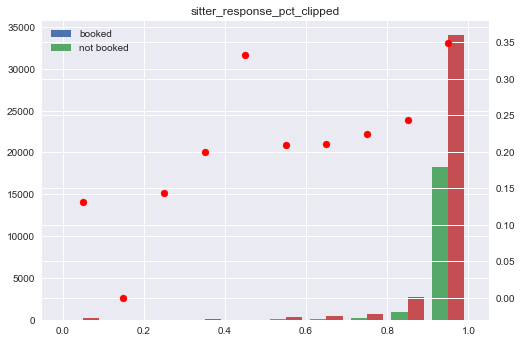

'prevalence is 0.996188603753'

'=================================================================='

max_clip is 1.0


'Feature :: service_response_pct_clipped'

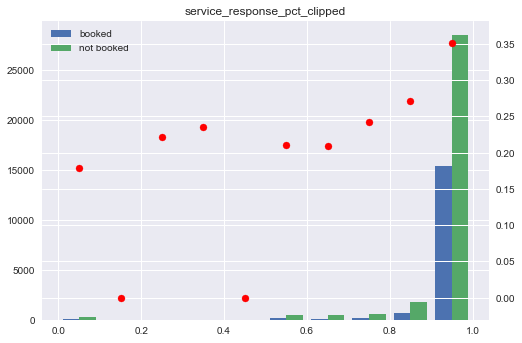

'prevalence is 0.993010433107'

'=================================================================='

signup_reason


,count,mean
signup_reason,,
expand-my-business,1673,0.328751
extra-income,34569,0.341809
fun,9016,0.322538
short-term-extra-cash,3768,0.305732
sole-source-of-income,6740,0.356380


'=================================================================='

expected_earnings


,count,mean
expected_earnings,,
125-400,27585,0.332608
1525-2500,1880,0.377660
2525-4000,1004,0.363546
425-825,9786,0.345391
850-1500,4596,0.364883
<100,10246,0.320320
>4025,669,0.357250


'=================================================================='

'Feature :: available_all_days'

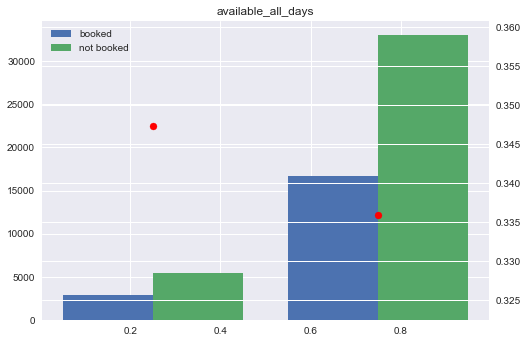

'prevalence is 0.857995309051'

'=================================================================='

'Feature :: rover_training'

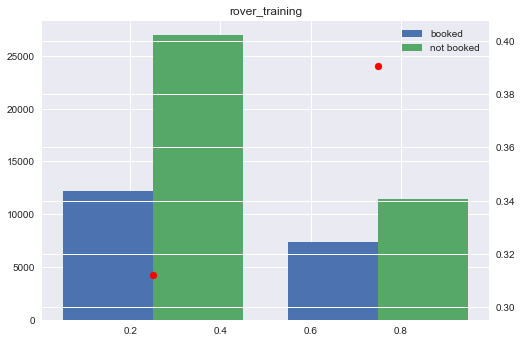

'prevalence is 0.324020419426'

'=================================================================='

'Feature :: lessonly_training'

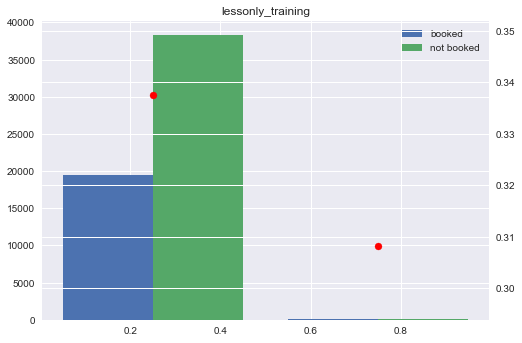

'prevalence is 0.00251793598234'

'=================================================================='

'Feature :: background_check_taken'

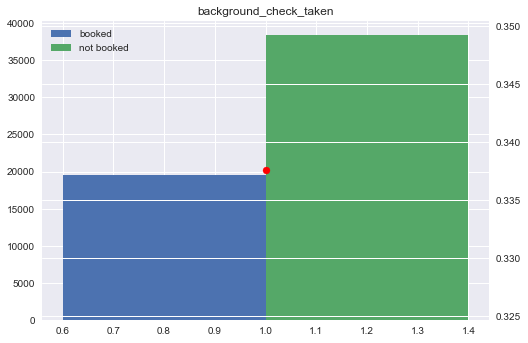

'prevalence is 1.0'

'=================================================================='

'Feature :: has_insurance'

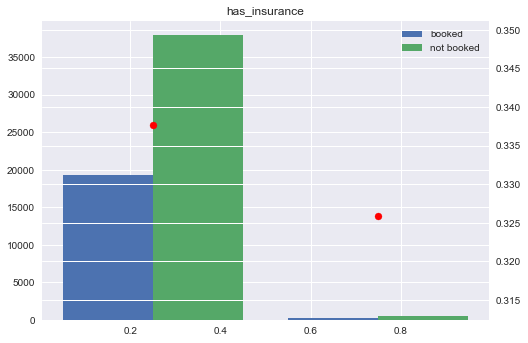

'prevalence is 0.0123309878587'

'=================================================================='

max_clip is 4.0


'Feature :: num_testimonials_clipped'

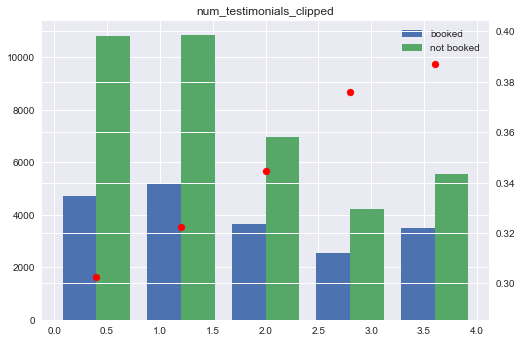

'prevalence is 0.73233995585'

'=================================================================='

max_clip is 0.0


'Feature :: profile_quality_clipped'

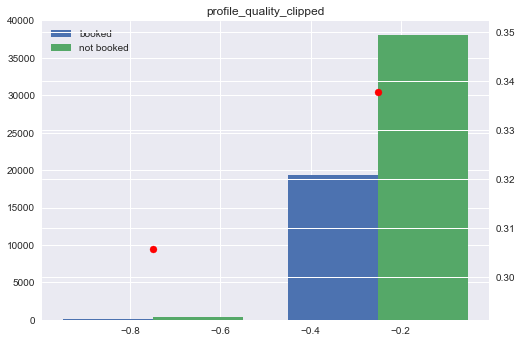

'prevalence is 0.00896799116998'

'=================================================================='

'Feature :: facebook_connected'

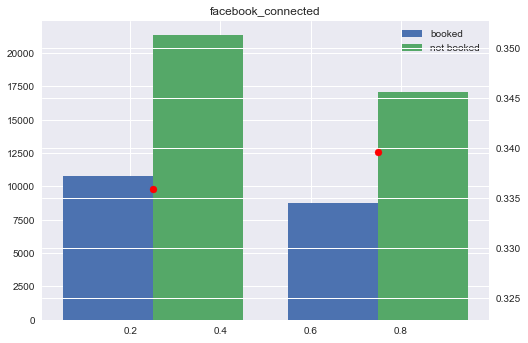

'prevalence is 0.445605684327'

'=================================================================='

max_clip is 2.0


'Feature :: num_pets_clipped'

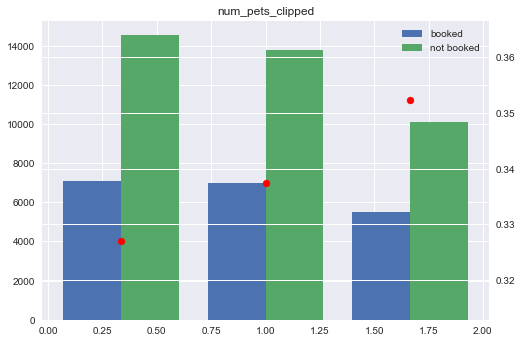

'prevalence is 0.627414459161'

'=================================================================='

max_clip is 5.0


'Feature :: spaces_available_clipped'

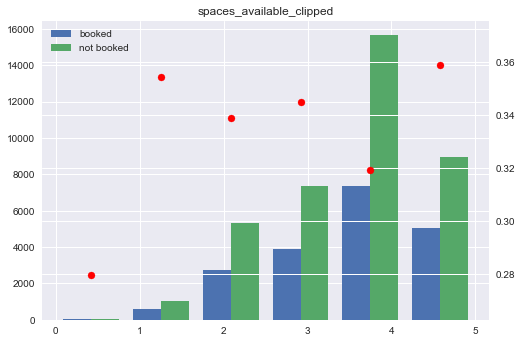

'prevalence is 0.998827262693'

'=================================================================='

'Feature :: small_dogs'

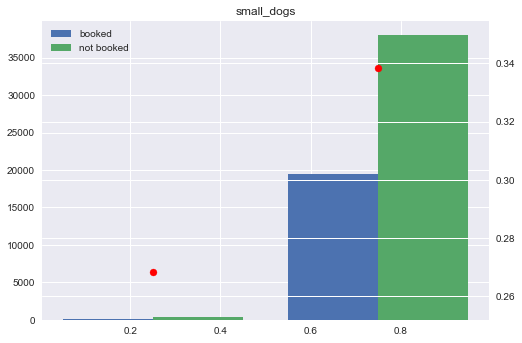

'prevalence is 0.990549116998'

'=================================================================='

'Feature :: medium_dogs'

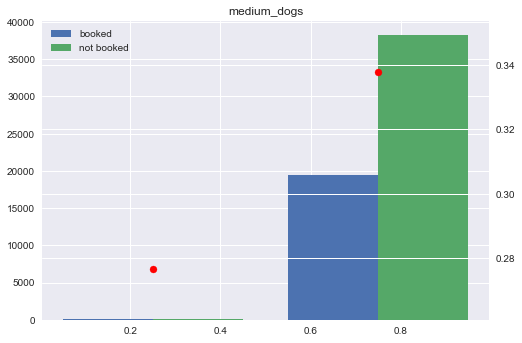

'prevalence is 0.996136865342'

'=================================================================='

'Feature :: large_dogs'

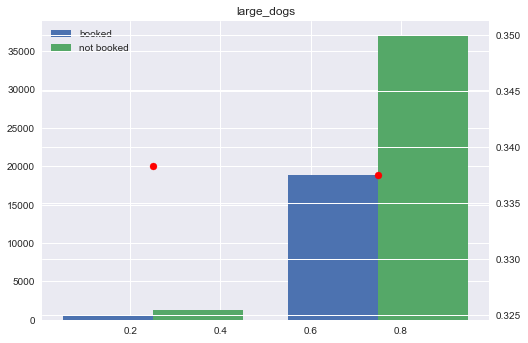

'prevalence is 0.965800910596'

'=================================================================='

'Feature :: giant_dogs'

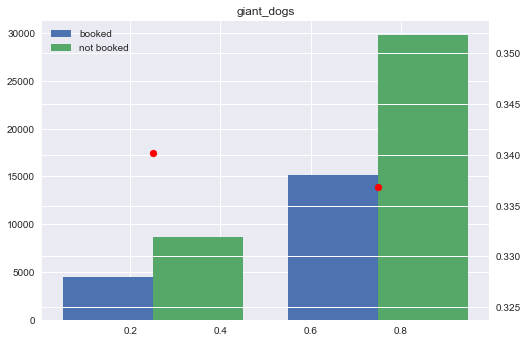

'prevalence is 0.77486892936'

'=================================================================='

max_clip is 310.0


'Feature :: dogs_experience_len_clipped'

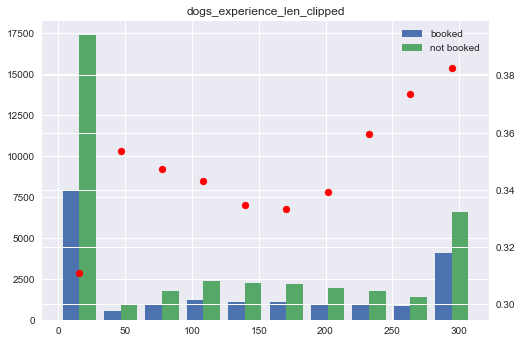

'prevalence is 0.570346992274'

'=================================================================='

max_clip is 1152.0


'Feature :: description_len_clipped'

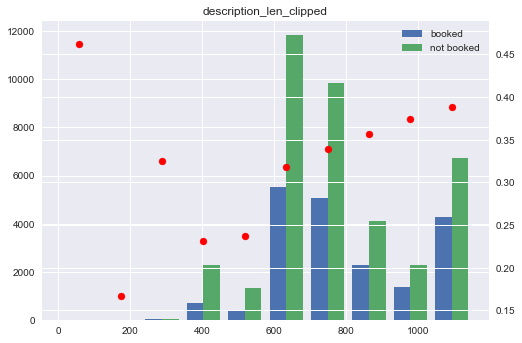

'prevalence is 0.999775800221'

'=================================================================='

max_clip is 21.0


'Feature :: num_images_clipped'

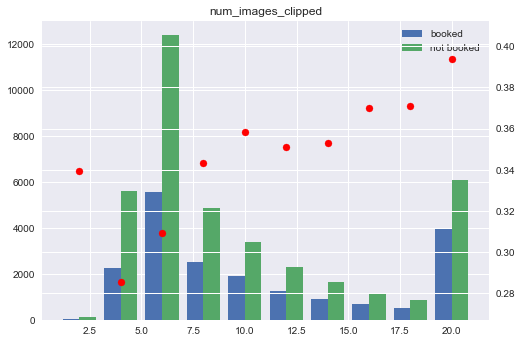

'prevalence is 1.0'

'=================================================================='

max_clip is 474.0


'Feature :: avg_testimonial_len_clipped'

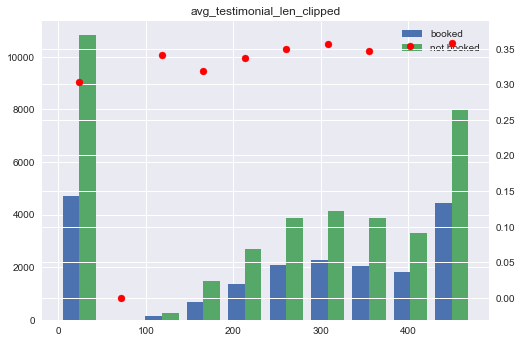

'prevalence is 0.73233995585'

'=================================================================='

max_clip is 7.5515809


'Feature :: avg_image_resolution_clipped'

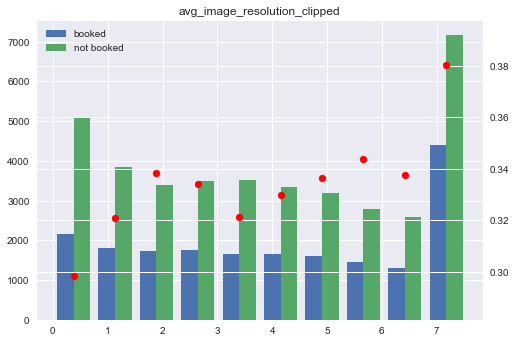

'prevalence is 0.992670391832'

'=================================================================='

gender


,count,mean
gender,,
f,47761,0.336132
m,7029,0.347418


'=================================================================='

max_clip is 20.0


'Feature :: years_of_experience_clipped'

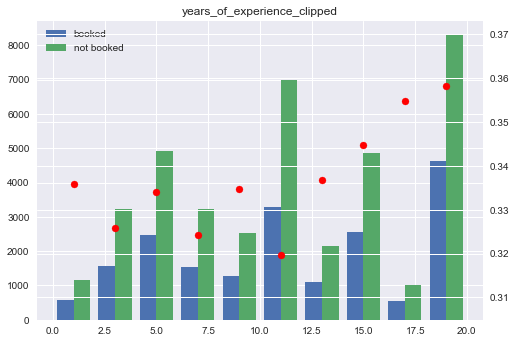

'prevalence is 0.994083248521'

'=================================================================='

max_clip is 0.0


'Feature :: donation_clipped'

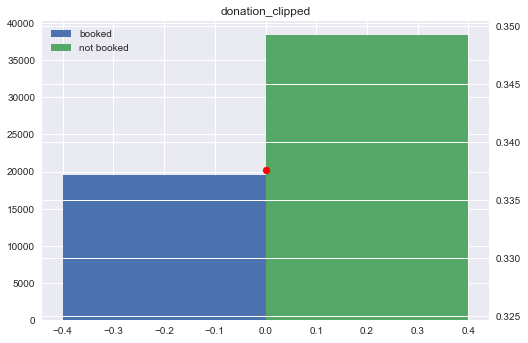

'prevalence is 0.0'

'=================================================================='

'Feature :: app_downloaded'

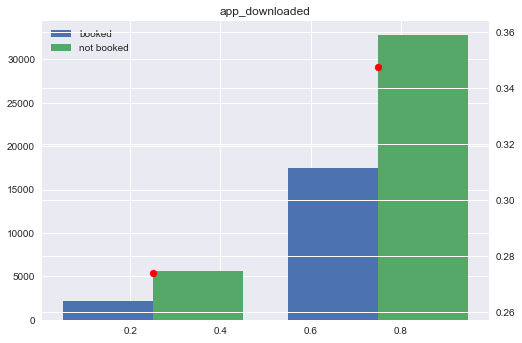

'prevalence is 0.86630794702'

'=================================================================='

verified_by


,count,mean
verified_by,,
None,1491,0.329980
None admin,1,0.000000
None sms,67,0.522388
None voice,24,0.291667
None voice sms,1,0.000000
admin,215,0.367442
admin None,5,0.600000
admin sms,4,0.500000
sms,53713,0.337367


'=================================================================='

'Feature :: used_rover_to_find_sitter'

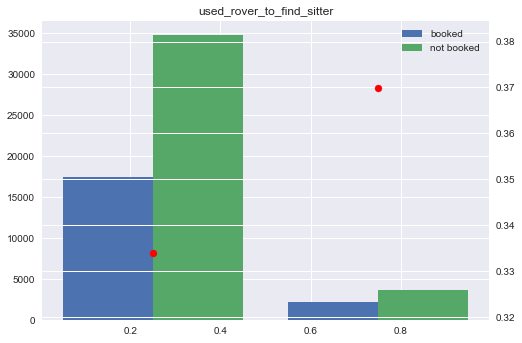

'prevalence is 0.0999758554084'

'=================================================================='

building_type


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide


,count,mean
building_type,,


'=================================================================='

yard_type


,count,mean
yard_type,,


'=================================================================='

'Feature :: inspected_home'

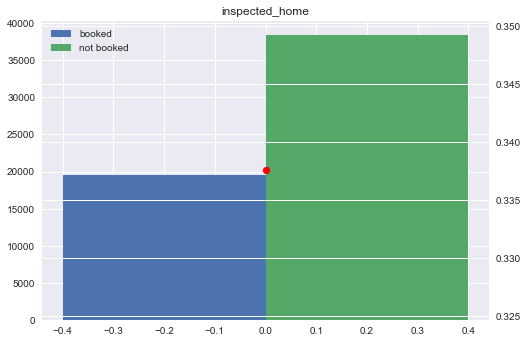

'prevalence is 0.0'

'=================================================================='

max_clip is 21609.0


'Feature :: avg_service_response_seconds_clipped'

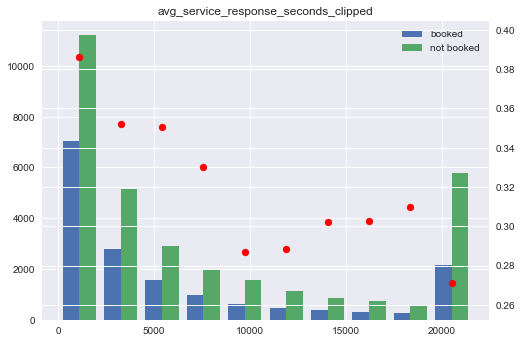

'prevalence is 1.0'

'=================================================================='

max_clip is 26269.0


'Feature :: avg_sitter_response_seconds_clipped'

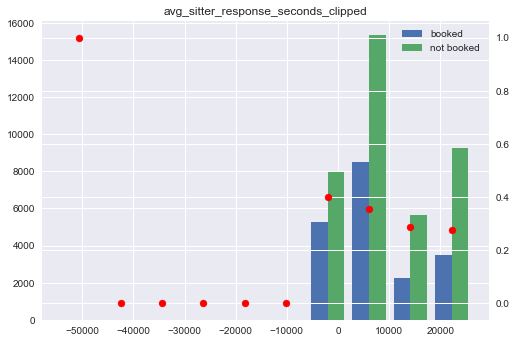

'prevalence is 0.99998268788'

'=================================================================='

max_clip is 1.0


'Feature :: rover_imported_ratio_clipped'

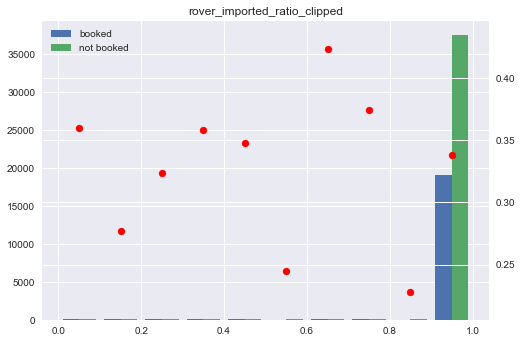

'prevalence is 0.999137514662'

'=================================================================='

max_clip is 84.0


'Feature :: calendar_recency_clipped'

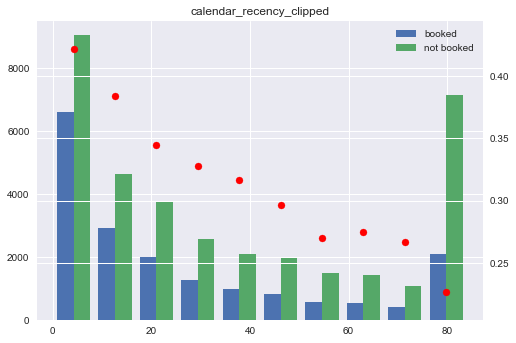

'prevalence is 0.949862031423'

'=================================================================='

max_clip is 5.0


'Feature :: spaces_available_clipped'

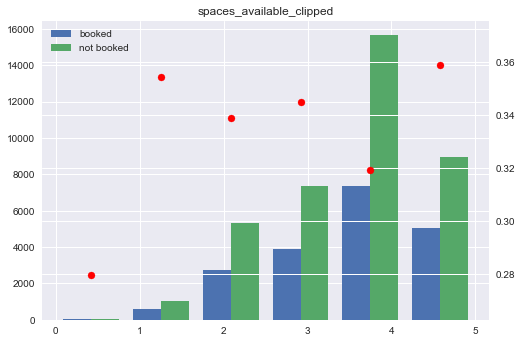

'prevalence is 0.998827262693'

'=================================================================='

,feature_name,prevalance
0,sitter_response_pct,0.996189
1,service_response_pct,0.993010
2,signup_reason,1.000000
3,expected_earnings,1.000000
4,available_all_days,0.857995
5,rover_training,0.324020
6,lessonly_training,0.002518
7,background_check_taken,1.000000
8,has_insurance,0.012331
9,num_testimonials,0.732340


,feature_name,max_clip,min_clip
0,sitter_response_pct,1.000000,0.900000
1,service_response_pct,1.000000,0.900000
2,signup_reason,-1.000000,-1.000000
3,expected_earnings,-1.000000,-1.000000
4,available_all_days,-1.000000,-1.000000
5,rover_training,-1.000000,-1.000000
6,lessonly_training,-1.000000,-1.000000
7,background_check_taken,-1.000000,-1.000000
8,has_insurance,-1.000000,-1.000000
9,num_testimonials,4.000000,0.000000


In [9]:
from IPython.display import display
#from analytics_lib.Bucket_BR_Plot import c_bucketplot
start = False
exclude = list()
prevalance = pd.DataFrame(columns=['feature_name','prevalance'])
clip = pd.DataFrame(columns=['feature_name','max_clip','min_clip'])

ob_numerical = ob.select_dtypes(include=['float64'])
display_switch = True
index = 0
for i in ob_raw_fea:
    #first feature    
    if ('_request' not in i and '_booking' not in i and 'cbr' not in i):
        
        fea_ = i
        max_clip = -1
        min_clip = -1
        if fea_ in list(ob_numerical):
            if(len(ob[pd.isnull(ob[i])==False][i].unique()) > 2):
                max_clip = ob[fea_].quantile(0.85,interpolation='nearest')
                min_clip = ob[fea_].quantile(0.1,interpolation='nearest')
                ob[i+'_clipped'] = ob[i].clip(upper = max_clip)
                fea_ = ob[i+'_clipped']
                fea_ = i + '_clipped'
                print 'max_clip is ' + str(max_clip)
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                perc = (ob[fea_].count()-ob[ob[fea_]==0][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            display('Feature :: ' + str(fea_))
            if(display_switch):
                Bucket_BR_Plot(ob[pd.isnull(ob[fea_])==False],fea_col=str(fea_),booked_col='booked',no_bin=min(10,len(ob[fea_].unique())),fig_name=fea_)
            display('prevalence is '+str(perc))
        else:
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[ob[fea_]==''][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                print fea_
                perc = (ob[fea_].count()-ob[ob[fea_]==''][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            if(display_switch):   
                display(ob.groupby(fea_).booked.agg(['count','mean']))   
            #display('prevalence is '+str(perc))
        if (perc<5.0/100):
            exclude = exclude+[fea_]
        prevalance.loc[index] = [i,perc]
        clip.loc[index] = [i,max_clip,min_clip]
        index = index + 1
        display('==================================================================')
display(prevalance)
display(clip)
    

In [10]:
def basic_stats_on_feature(ob, feature_cols,display_switch=True):
    from IPython.display import display
    #from analytics_lib.Bucket_BR_Plot import c_bucketplot
    exclude = list()
    prevalance = pd.DataFrame(columns=['feature_name','prevalance'])
    ob_numerical = ob.select_dtypes(include=['float64','int64','bool_'])
    display_switch = display_switch
    index = 0
    for i in feature_cols:
        fea_ = i
        print fea_
        if fea_ in list(ob_numerical):
            if(len(ob[pd.isnull(ob[i])==False][i].unique()) > 3):
                max_clip = ob[fea_].quantile(0.85,interpolation='nearest')
                ob[i+'_clipped'] = ob[i].clip(upper = max_clip)
                fea_ = ob[i+'_clipped']
                fea_ = i + '_clipped'
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                perc = (ob[fea_].count()-ob[ob[fea_]==0][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            display('Feature :: ' + str(fea_))
            if(display_switch):
                Bucket_BR_Plot(ob[pd.isnull(ob[fea_])==False],fea_col=str(fea_),booked_col='booked',no_bin=min(10,len(ob[fea_].unique())),fig_name=fea_)
            display('prevalence is '+str(perc))
        else:
            print i +' is not numerical'
            if(ob[pd.isnull(ob[fea_])][fea_].count() > 0):
                perc = (ob[fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            else:
                #doesn't have null
                perc = (ob[fea_].count()-ob[ob[fea_]==''][fea_].count()-ob[pd.isnull(ob[fea_])][fea_].count())/(ob[fea_].count()+0.0)
            if(display_switch):   
                display(ob.groupby(fea_).booked.agg(['count','mean']))   
            #display('prevalence is '+str(perc))
        if (perc<5.0/100):
            exclude = exclude+[fea_]
        prevalance.loc[index] = [i,perc]
        index = index + 1
        display('==================================================================')
    display(prevalance.sort_values(by=prevalance,ascending=False))
    return prevalance

In [11]:
prevalance.sort_values(by='prevalance',ascending=False)

,feature_name,prevalance
2,signup_reason,1.000000
3,expected_earnings,1.000000
32,avg_service_response_seconds,1.000000
7,background_check_taken,1.000000
27,verified_by,1.000000
23,gender,1.000000
20,num_images,1.000000
33,avg_sitter_response_seconds,0.999983
19,description_len,0.999776
34,rover_imported_ratio,0.999138


In [12]:
feature_to_eval = ['signup_reason',
 u'available_all_days',
 u'rover_training',
 u'background_check_taken',
 u'has_insurance',
 u'is_premier',
 u'facebook_connected',
 u'app_downloaded',
 u'used_rover_to_find_sitter',
 u'building_type',
 u'yard_type',
 u'inspected_home', 
 'calendar_recency','provider_cbr_all',
 'num_testimonials',
 u'spaces_available',
 u'description_len',
 u'num_images',
 u'avg_testimonial_len',
 u'avg_image_resolution',
 u'years_of_experience','avg_service_response_seconds',
 'sitter_response_pct',
 'avg_sitter_response_seconds',
 'service_response_pct','lessonly_training',
 'first_booking', 'second_booking', 'third_booking', 'first_request', 'second_request', 'third_request',  'rover_imported_ratio', 'rover_imported_ratio_x_cbr','no_previous_request']

In [13]:
upper_clip_fea = [
 'calendar_recency',
 'num_testimonials',
 'spaces_available',
 'description_len',
 'num_images',
 'avg_testimonial_len',
 'avg_image_resolution',
 'years_of_experience','avg_service_response_seconds','avg_sitter_response_seconds']
lower_clip_fea = ['sitter_response_pct',
 'service_response_pct']


In [14]:
clip_setting_file_name = os.path.join(data_dir,'features_clipped_settings_'+slug+'.csv')
if (reset_switch == True):

    clip_setting = pd.DataFrame(columns=['feature_name','min_clip','max_clip'])
    clip_setting['feature_name'] = upper_clip_fea + lower_clip_fea
    for fea in upper_clip_fea:
        temp =  clip.loc[clip.feature_name == fea,'max_clip'].values[0]
        clip_setting.loc[clip_setting.feature_name == fea,'max_clip'] = temp
    for fea in lower_clip_fea:
        temp =  clip.loc[clip.feature_name == fea,'min_clip'].values[0]
        clip_setting.loc[clip_setting.feature_name == fea,'min_clip'] = temp
    display(clip_setting)
    clip_setting.to_csv(clip_setting_file_name)
else :
    clip_setting = pd.read_csv(clip_setting_file_name)

,feature_name,min_clip,max_clip
0,calendar_recency,NaN,84
1,num_testimonials,NaN,4
2,spaces_available,NaN,5
3,description_len,NaN,1152
4,num_images,NaN,21
5,avg_testimonial_len,NaN,474
6,avg_image_resolution,NaN,7.55158
7,years_of_experience,NaN,20
8,avg_service_response_seconds,NaN,21609
9,avg_sitter_response_seconds,NaN,26269


In [15]:
categorical_fea = ['signup_reason',
 u'building_type',
 u'yard_type','no_previous_request']

In [16]:
dummy_col = ['conversation_id','booked','status']

## Use radom forest to rank feature importance

# fill in nan value with median value

In [17]:
fill_setting_file_name = os.path.join(data_dir,'features_fill_nan_settings_'+slug+'.csv')


ob_dummy = pd.get_dummies(ob[feature_to_eval+['status']+['booked']+['conversation_id']],columns=categorical_fea)
ob_dummy_filled_bygroup = ob_dummy

if (reset_switch == True):
    fill_setting = pd.DataFrame(columns=['feature_name','matriculation_level','fill_value'])
    for status in ob_dummy.status.unique():
        fill_setting_sub = pd.DataFrame(columns=['feature_name','matriculation_level','fill_value'])
        fill_setting_sub['feature_name']  = feature_to_eval
        fill_setting_sub['matriculation_level'] = status
        sub = ob_dummy[ob_dummy.status == status]
        for i in list(ob_dummy):
            if (sub.loc[pd.isnull(sub[i]),i].size > 0):
    #             print sub[i].agg(['median','min','max'])
#                 print status + '::' + i
    #             print sub.loc[pd.isnull(sub[i]),i].size
                temp = sub.loc[pd.isnull(sub[i]) == False,i].median()
#                 print temp
                fill_setting_sub.loc[(fill_setting_sub.feature_name == i) & (fill_setting_sub.matriculation_level == status),'fill_value'] = temp
#                 print '======='
                ob_dummy_filled_bygroup.loc[(ob_dummy_filled_bygroup.status == status)&(pd.isnull(ob_dummy_filled_bygroup[i])),i] = temp
        fill_setting = fill_setting.append(fill_setting_sub)  
    fill_setting.to_csv(fill_setting_file_name)
else:
    fill_setting = pd.read_csv(fill_setting_file_name)
display(fill_setting[pd.isnull(fill_setting.fill_value) == False].sort_values(by='feature_name'))                                                                   

,feature_name,matriculation_level,fill_value
21,avg_service_response_seconds,red,4698
21,avg_service_response_seconds,green,2733
21,avg_service_response_seconds,seeding,1391.5
23,avg_sitter_response_seconds,seeding,1941
23,avg_sitter_response_seconds,green,5264
12,calendar_recency,green,23
12,calendar_recency,red,21
12,calendar_recency,seeding,21
13,provider_cbr_all,seeding,0
32,rover_imported_ratio,green,1


In [18]:
ob.groupby('provider_type').rover_imported_ratio.agg(['count','mean','median','min','max'])

,count,mean,median,min,max
provider_type,,,,,
merged,3738,0.893068,1.0,0.0,1.0
migrated,2227,0.813669,1.0,0.0,1.0
rover,47116,1.000000,1.0,1.0,1.0
rover-havent-merged,4891,1.000000,1.0,1.0,1.0


## clip with 85% quantile and 10% in the group

In [19]:
ob_dummy_filled_bygroup_clipped = ob_dummy_filled_bygroup.copy()
for fea_ in upper_clip_fea:
    if (fea_ not in categorical_fea and 'clip' not in fea_):
        print fea_
        max_clip = clip_setting.loc[clip_setting.feature_name == fea_,'max_clip'].values[0]
        ob_dummy_filled_bygroup_clipped[fea_+'_clipped'] = ob_dummy_filled_bygroup[fea_].clip(upper = max_clip )
        ob_dummy_filled_bygroup_clipped.drop(fea_,axis=1,inplace=True)   
for fea_ in lower_clip_fea:
    if (fea_ not in categorical_fea and 'clip' not in fea_):
        print fea_
        min_clip = clip_setting.loc[clip_setting.feature_name == fea_,'min_clip'].values[0]
        ob_dummy_filled_bygroup_clipped[fea_+'_clipped'] = ob_dummy_filled_bygroup[fea_].clip(lower = min_clip )
        ob_dummy_filled_bygroup_clipped.drop(fea_,axis=1,inplace=True)  

calendar_recency
num_testimonials
spaces_available
description_len
num_images
avg_testimonial_len
avg_image_resolution
years_of_experience
avg_service_response_seconds
avg_sitter_response_seconds
sitter_response_pct
service_response_pct


In [20]:
no_eval_col = ['first_booking', 'second_booking', 'third_booking', 'first_request', 'second_request', 'third_request']

analytics_lib/FeaImportancebyRF.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf.fit(X, y)


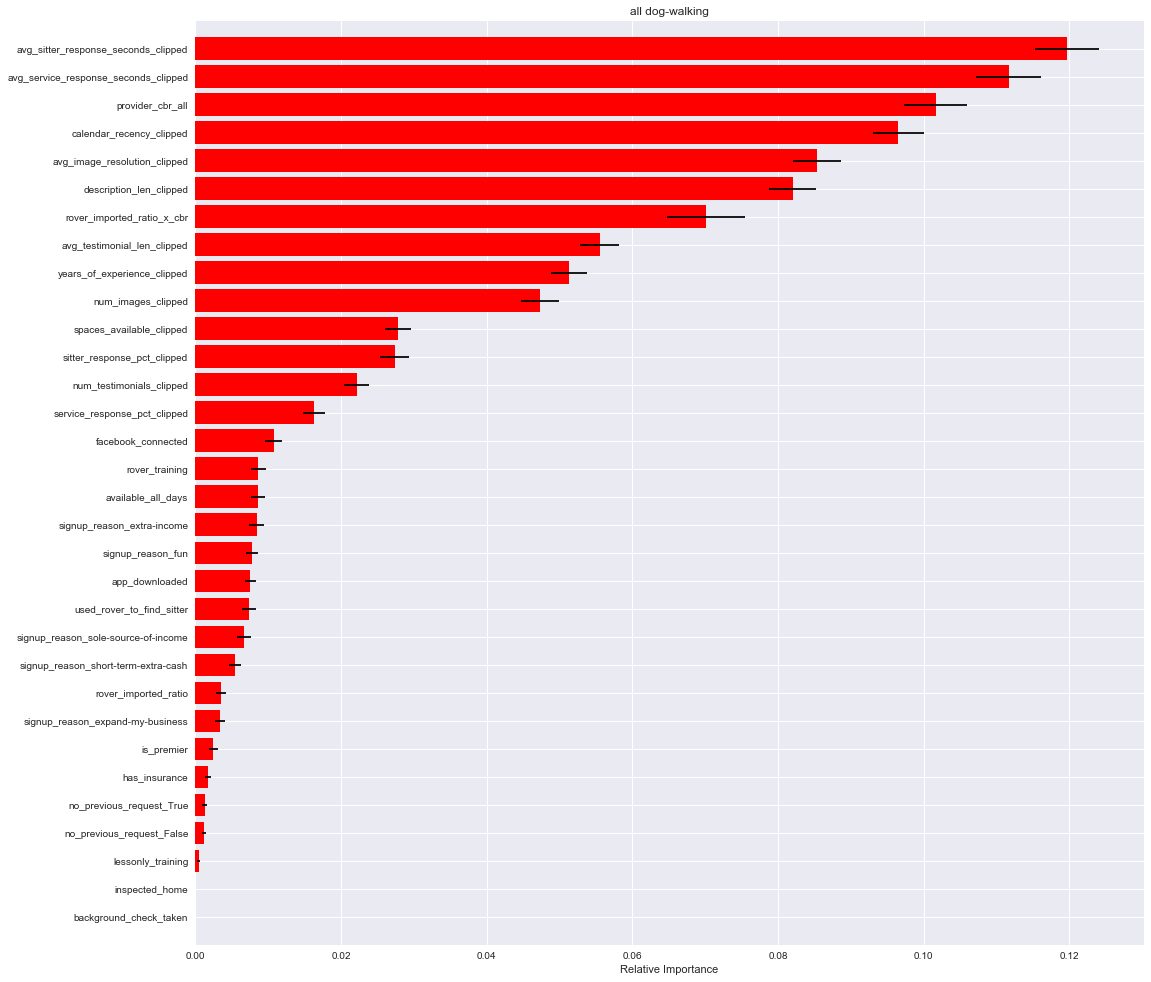

,importance,name,prevalance
0,0.1197,avg_sitter_response_seconds_clipped,0.9999
1,0.1117,avg_service_response_seconds_clipped,1.0000
2,0.1016,provider_cbr_all,0.8491
3,0.0965,calendar_recency_clipped,0.9539
4,0.0854,avg_image_resolution_clipped,0.9927
5,0.0820,description_len_clipped,0.9998
6,0.0701,rover_imported_ratio_x_cbr,0.8487
7,0.0555,avg_testimonial_len_clipped,0.7323
8,0.0513,years_of_experience_clipped,0.9941
9,0.0473,num_images_clipped,1.0000


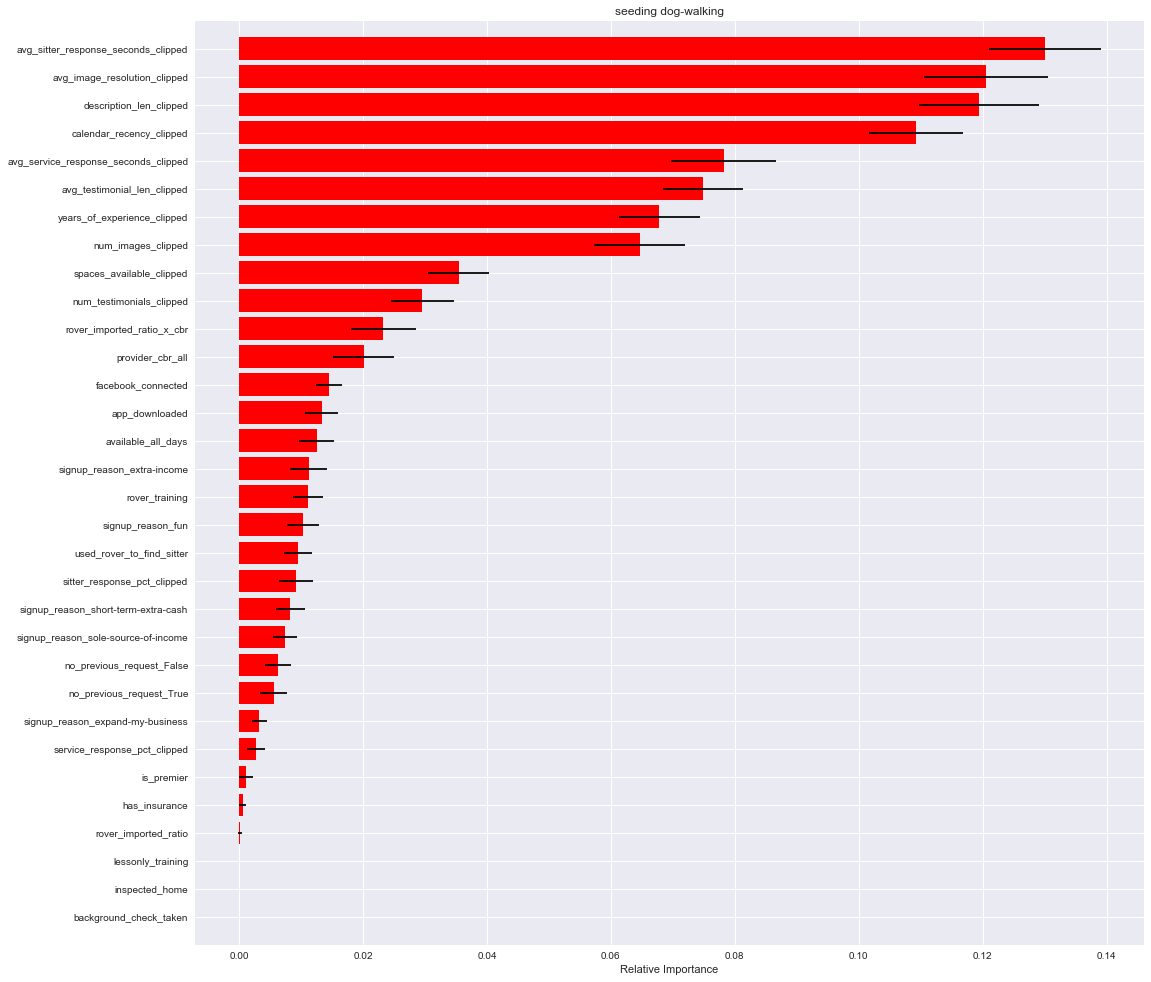

,importance,name,prevalance
0,0.1301,avg_sitter_response_seconds_clipped,0.9999
1,0.1205,avg_image_resolution_clipped,0.9977
2,0.1194,description_len_clipped,1.0000
3,0.1093,calendar_recency_clipped,0.9558
4,0.0782,avg_service_response_seconds_clipped,1.0000
5,0.0748,avg_testimonial_len_clipped,0.6763
6,0.0678,years_of_experience_clipped,0.9891
7,0.0647,num_images_clipped,1.0000
8,0.0354,spaces_available_clipped,0.9993
9,0.0296,num_testimonials_clipped,0.6763


None


'seeding dog-walking'

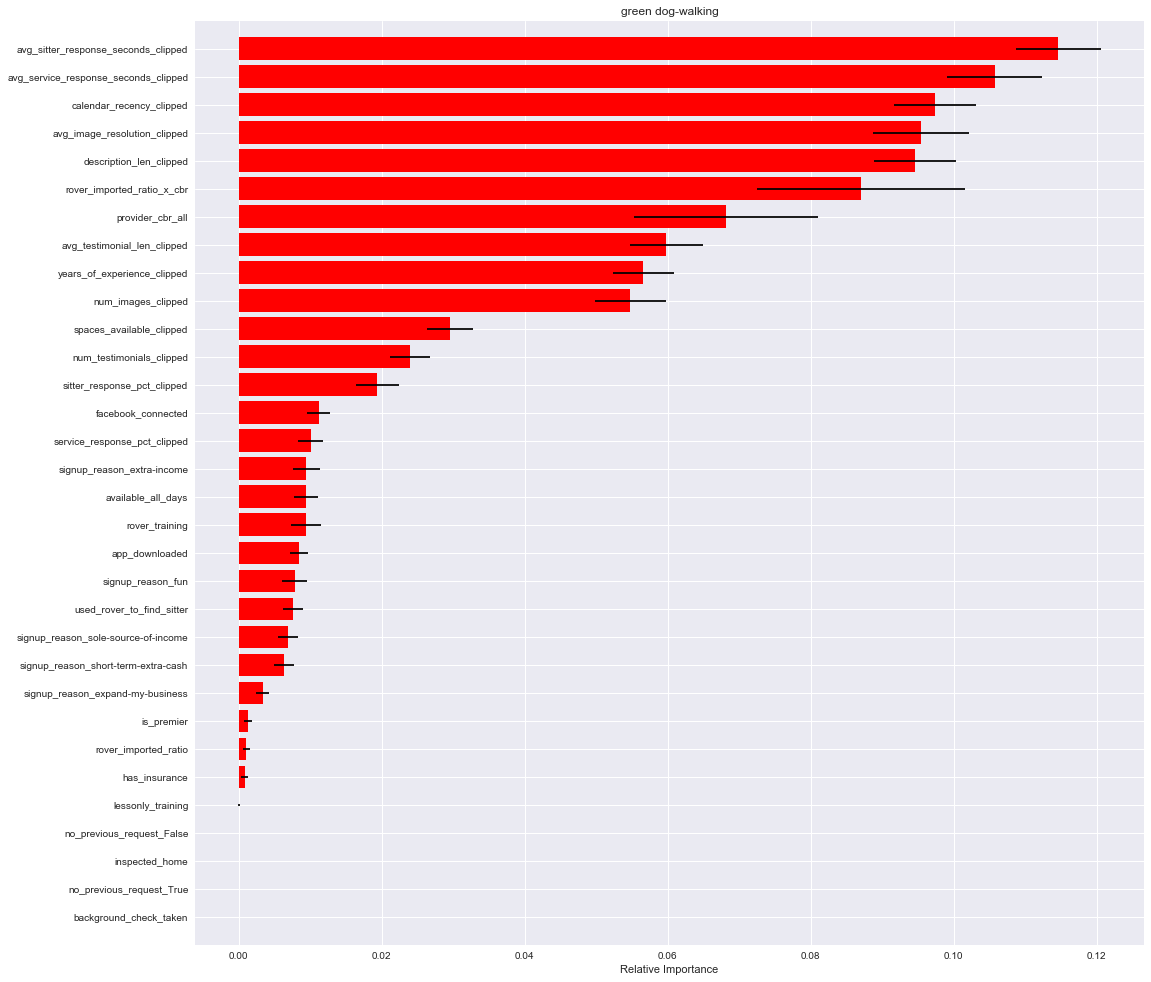

,importance,name,prevalance
0,0.1147,avg_sitter_response_seconds_clipped,1.0000
1,0.1057,avg_service_response_seconds_clipped,1.0000
2,0.0974,calendar_recency_clipped,0.9585
3,0.0954,avg_image_resolution_clipped,0.9947
4,0.0947,description_len_clipped,0.9999
5,0.0871,rover_imported_ratio_x_cbr,0.8577
6,0.0682,provider_cbr_all,0.8581
7,0.0598,avg_testimonial_len_clipped,0.7248
8,0.0566,years_of_experience_clipped,0.9930
9,0.0548,num_images_clipped,1.0000


None


'green dog-walking'

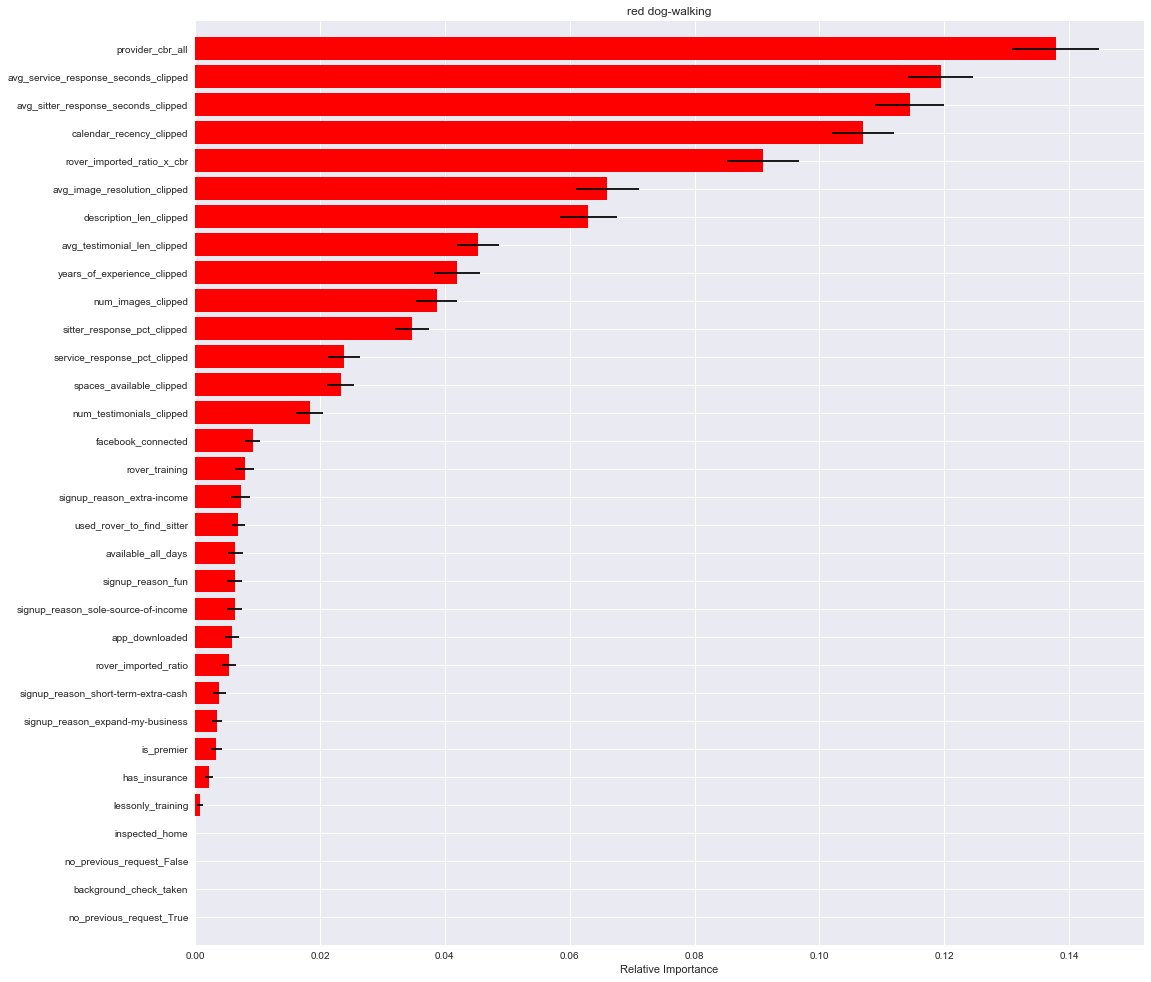

,importance,name,prevalance
0,0.1379,provider_cbr_all,0.9947
1,0.1194,avg_service_response_seconds_clipped,1.0000
2,0.1145,avg_sitter_response_seconds_clipped,0.9999
3,0.1070,calendar_recency_clipped,0.9503
4,0.0909,rover_imported_ratio_x_cbr,0.9943
5,0.0660,avg_image_resolution_clipped,0.9897
6,0.0630,description_len_clipped,0.9996
7,0.0453,avg_testimonial_len_clipped,0.7551
8,0.0419,years_of_experience_clipped,0.9964
9,0.0387,num_images_clipped,1.0000


None


'red dog-walking'

,importance,name,prevalance,status
0,0.1197,avg_sitter_response_seconds_clipped,0.9999,all
1,0.1117,avg_service_response_seconds_clipped,1.0000,all
2,0.1016,provider_cbr_all,0.8491,all
3,0.0965,calendar_recency_clipped,0.9539,all
4,0.0854,avg_image_resolution_clipped,0.9927,all
5,0.0820,description_len_clipped,0.9998,all
6,0.0701,rover_imported_ratio_x_cbr,0.8487,all
7,0.0555,avg_testimonial_len_clipped,0.7323,all
8,0.0513,years_of_experience_clipped,0.9941,all
9,0.0473,num_images_clipped,1.0000,all


In [21]:
from analytics_lib.FeaImportancebyRF import FeaImportancebyRF
importance_df = FeaImportancebyRF(ob_dummy_filled_bygroup_clipped.drop(dummy_col+no_eval_col,axis=1),ob_dummy_filled_bygroup_clipped[['booked']],fig_name='all '+slug)
display(importance_df)
importance_df['status'] = 'all'
for status in ['seeding','green','red']:
    sub = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status]
    a = FeaImportancebyRF(sub.drop(dummy_col+no_eval_col,axis=1),sub[['booked']],fig_name=status + ' ' + slug)
    display(a)
    a['status'] = status
    importance_df = importance_df.append(a)
    print(list(sub).remove('status'))
    fea_col = list(sub)
    fea_col.remove('status')
    display(status + ' '+slug)
display(importance_df)

In [22]:
feature_init = {'seeding':[],'green':[],'red':[]}
for status in ['seeding','green','red']:
    display('===========' + status + '===========')
    display
    #display(importance_df[importance_df.status==status])
    sub = importance_df[(importance_df.status==status)]
    #display(sub[sub.importance >= sub.importance.max()*0.3]['name'].tolist())
#     feature_init[status] = 
#     print sub.head()
    a = sub[sub.importance >= sub.importance.max()*0.4]['name'].tolist()
    b = ['first_booking',
 'second_booking',
 'first_request',
 'second_request']
    if (status != 'seeding'):
        b = b + ['third_booking','third_request']
    if 'relative_price_clipped' in a:
        a.remove('relative_price_clipped')
    if 'cbr*dv' in a:
        a = a + ['rover_dv_pct']
    feature_init[status]  = a+b
    print feature_init[status]

'===========seeding==========='

['avg_sitter_response_seconds_clipped', 'avg_image_resolution_clipped', 'description_len_clipped', 'calendar_recency_clipped', 'avg_service_response_seconds_clipped', 'avg_testimonial_len_clipped', 'years_of_experience_clipped', 'num_images_clipped', 'first_booking', 'second_booking', 'first_request', 'second_request']


'===========green==========='

['avg_sitter_response_seconds_clipped', 'avg_service_response_seconds_clipped', 'calendar_recency_clipped', 'avg_image_resolution_clipped', 'description_len_clipped', 'rover_imported_ratio_x_cbr', 'provider_cbr_all', 'avg_testimonial_len_clipped', 'years_of_experience_clipped', 'num_images_clipped', 'first_booking', 'second_booking', 'first_request', 'second_request', 'third_booking', 'third_request']


'===========red==========='

['provider_cbr_all', 'avg_service_response_seconds_clipped', 'avg_sitter_response_seconds_clipped', 'calendar_recency_clipped', 'rover_imported_ratio_x_cbr', 'avg_image_resolution_clipped', 'description_len_clipped', 'first_booking', 'second_booking', 'first_request', 'second_request', 'third_booking', 'third_request']


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'===========seeding==========='

['avg_sitter_response_seconds_clipped',
 'avg_image_resolution_clipped',
 'description_len_clipped',
 'calendar_recency_clipped',
 'avg_service_response_seconds_clipped',
 'avg_testimonial_len_clipped',
 'years_of_experience_clipped',
 'num_images_clipped',
 'first_booking',
 'second_booking',
 'first_request',
 'second_request']

provider_cbr_all avg_sitter_response_seconds_clipped


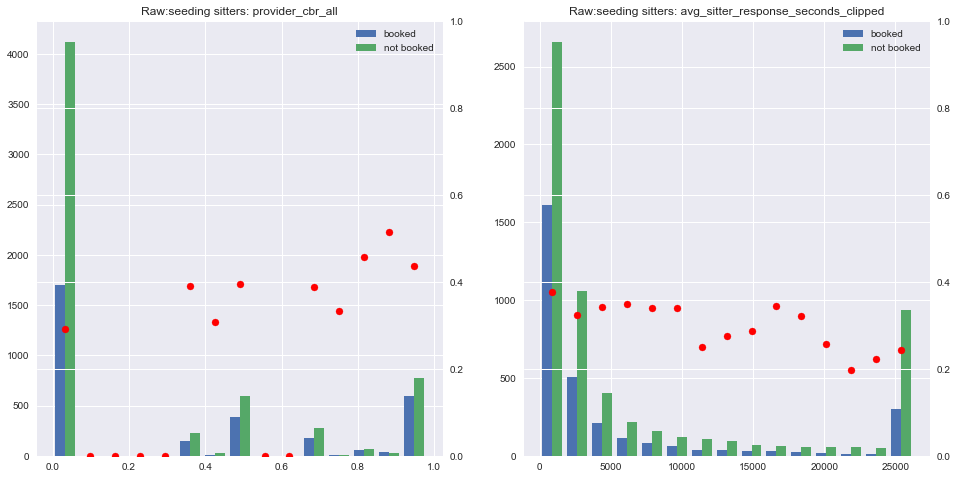

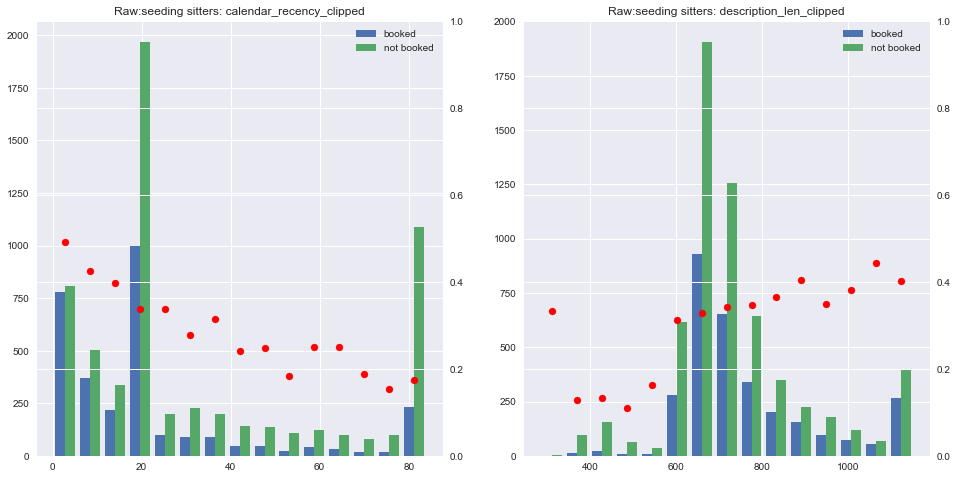

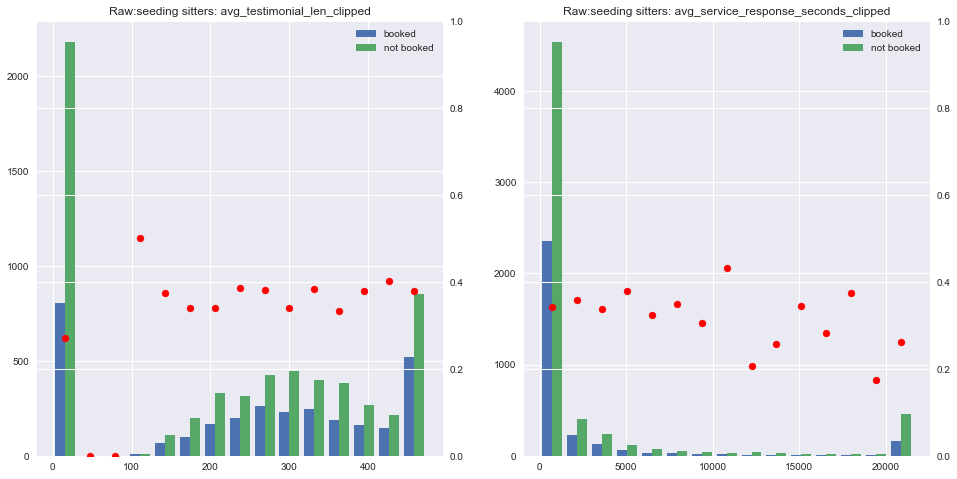

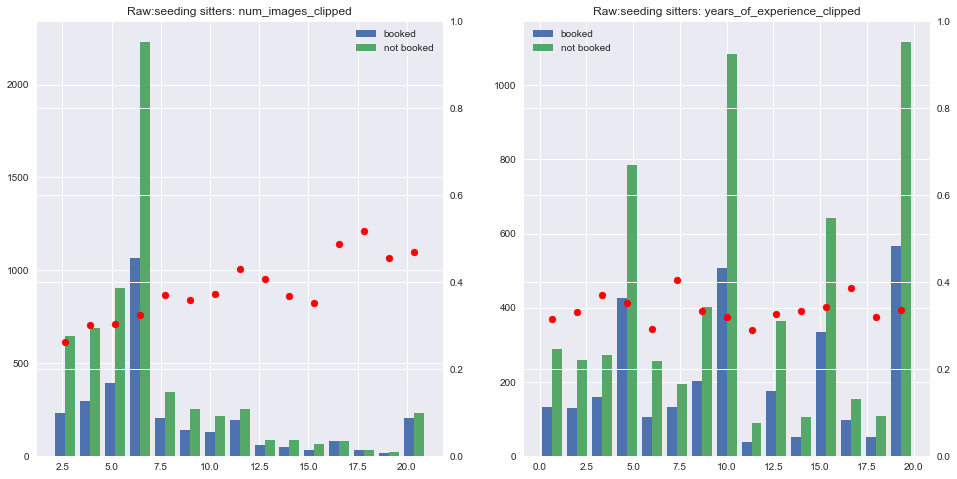

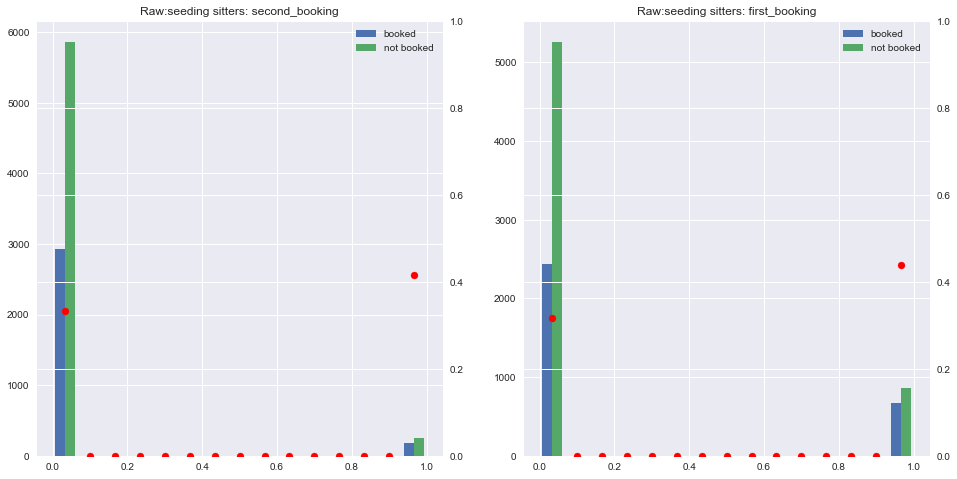

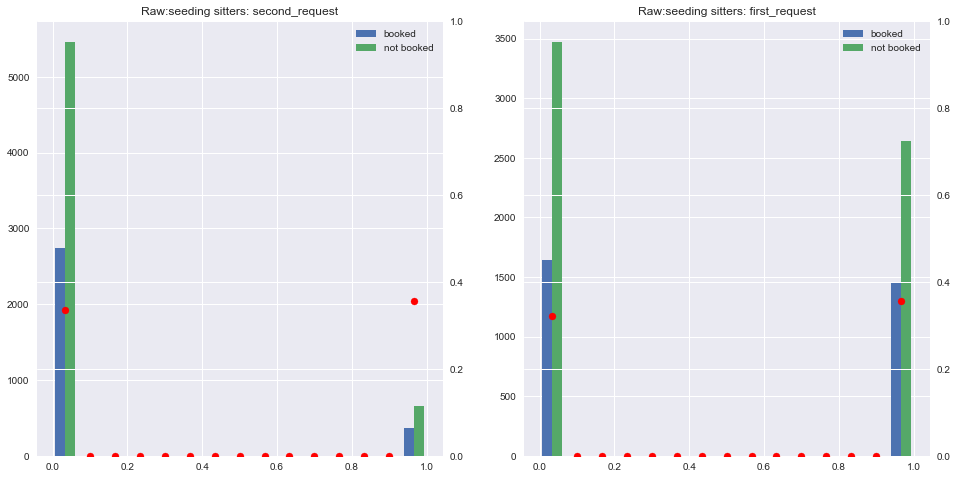

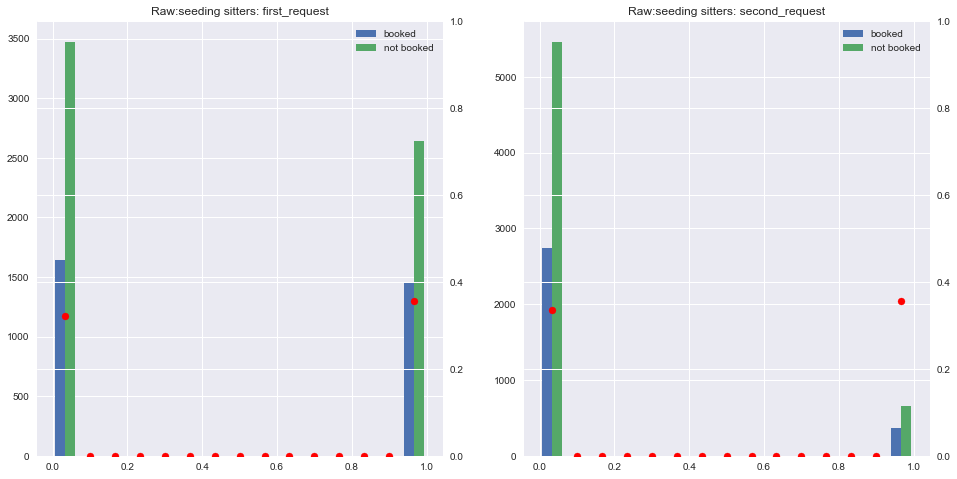

/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


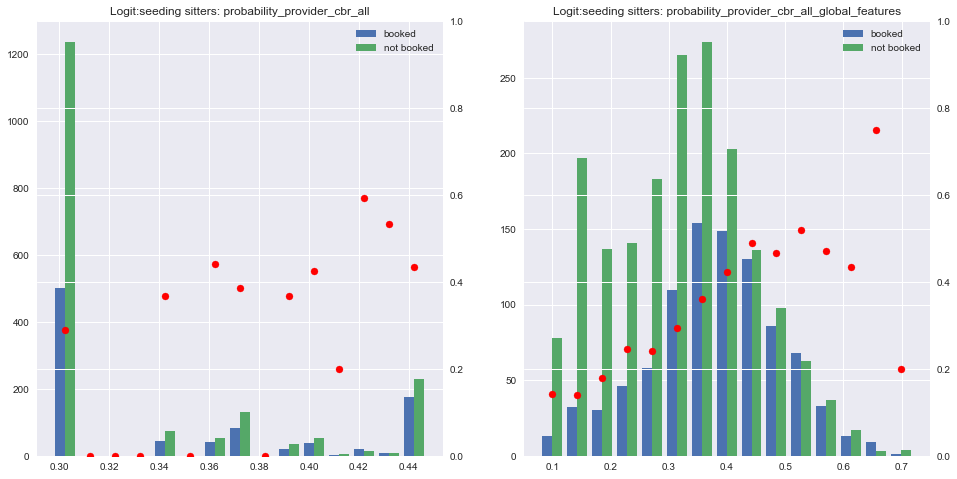

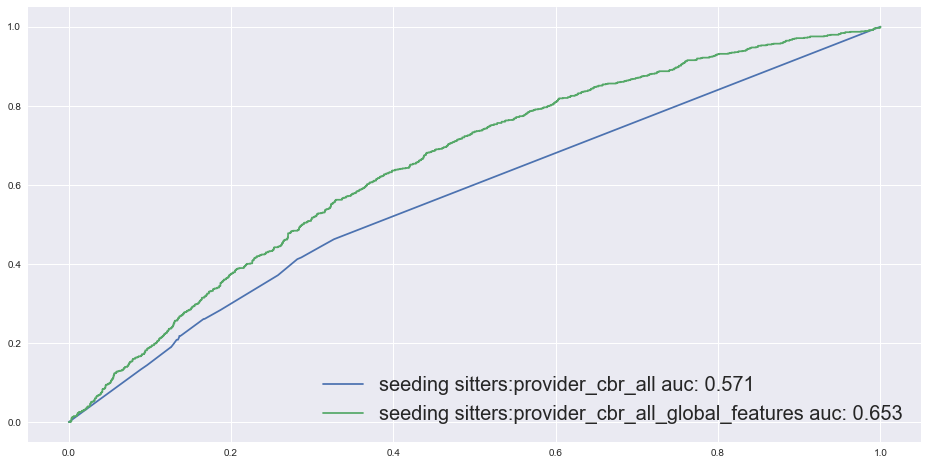

'===========green==========='

['avg_sitter_response_seconds_clipped',
 'avg_service_response_seconds_clipped',
 'calendar_recency_clipped',
 'avg_image_resolution_clipped',
 'description_len_clipped',
 'rover_imported_ratio_x_cbr',
 'provider_cbr_all',
 'avg_testimonial_len_clipped',
 'years_of_experience_clipped',
 'num_images_clipped',
 'first_booking',
 'second_booking',
 'first_request',
 'second_request',
 'third_booking',
 'third_request']

provider_cbr_all avg_sitter_response_seconds_clipped


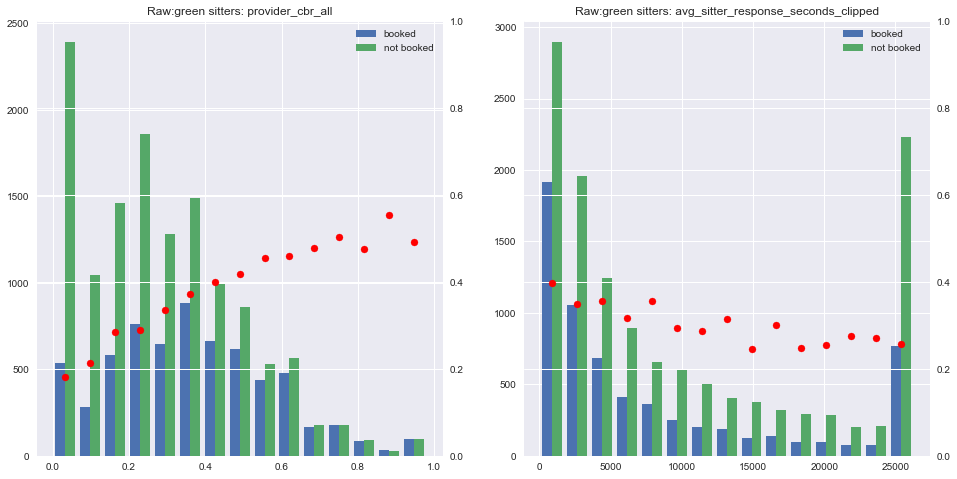

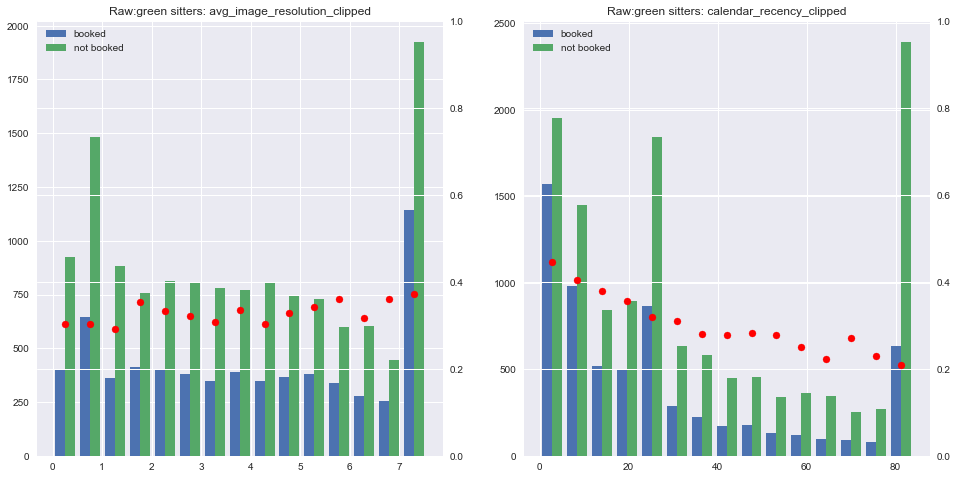

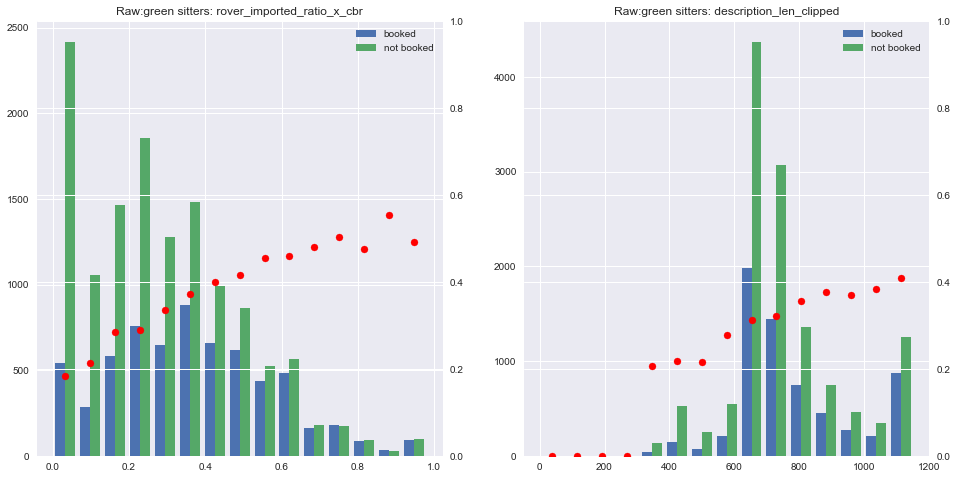

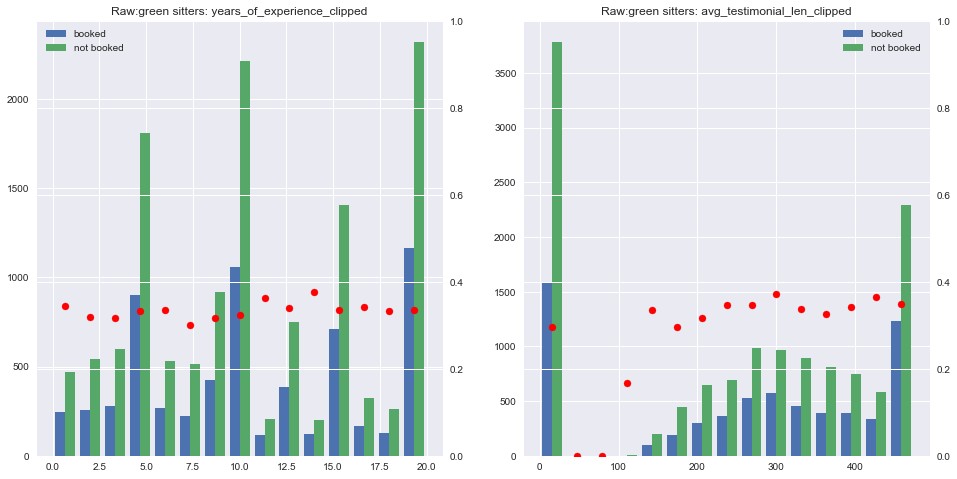

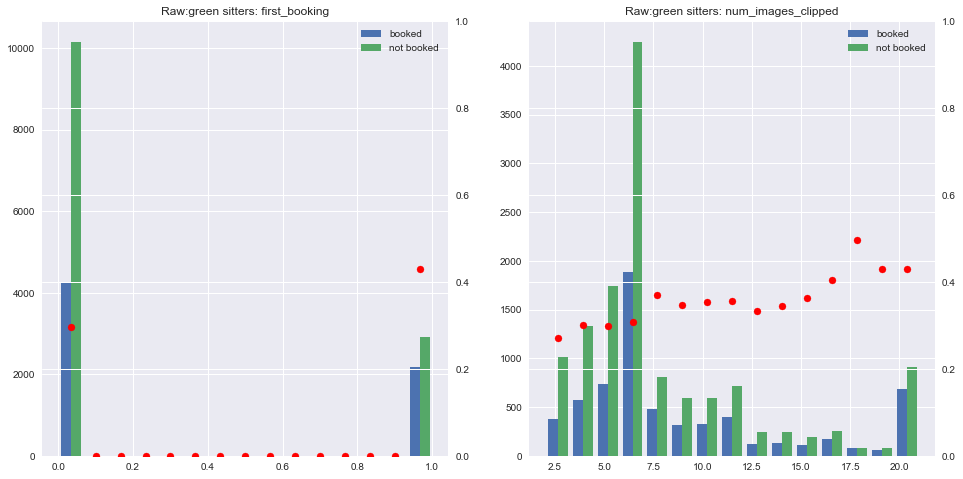

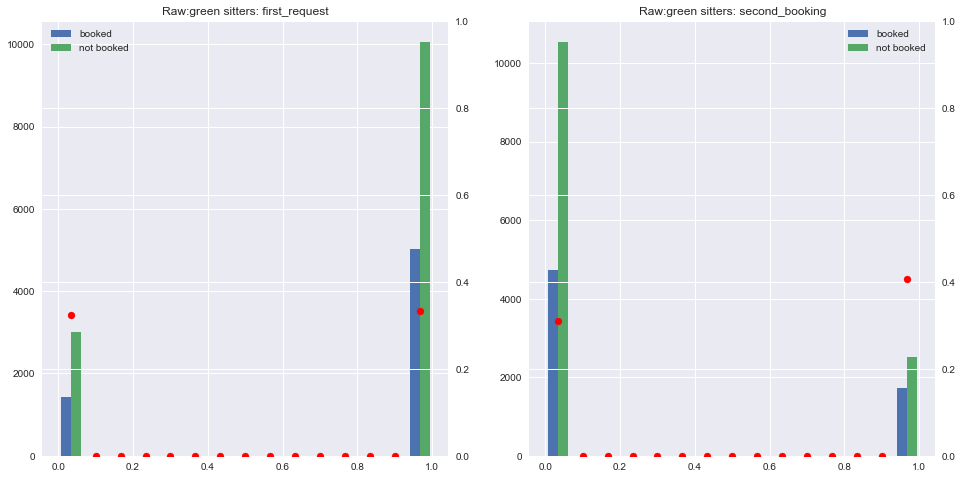

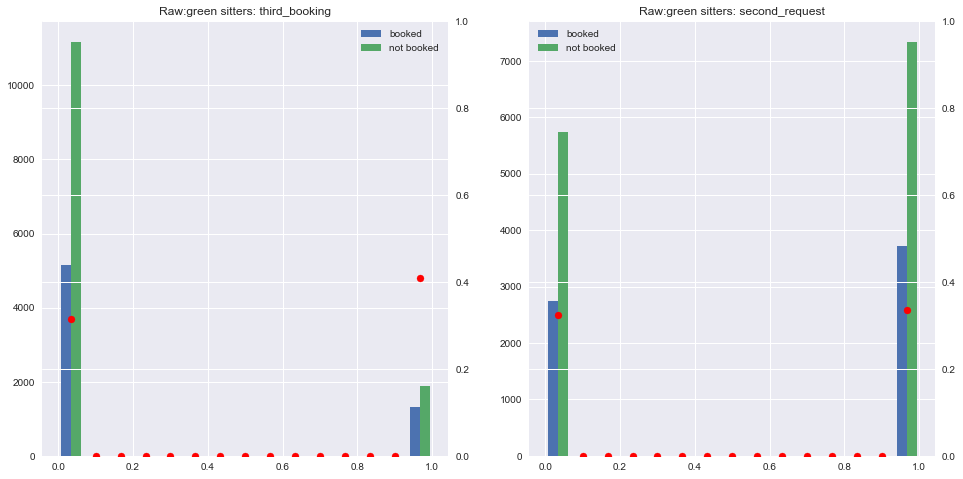

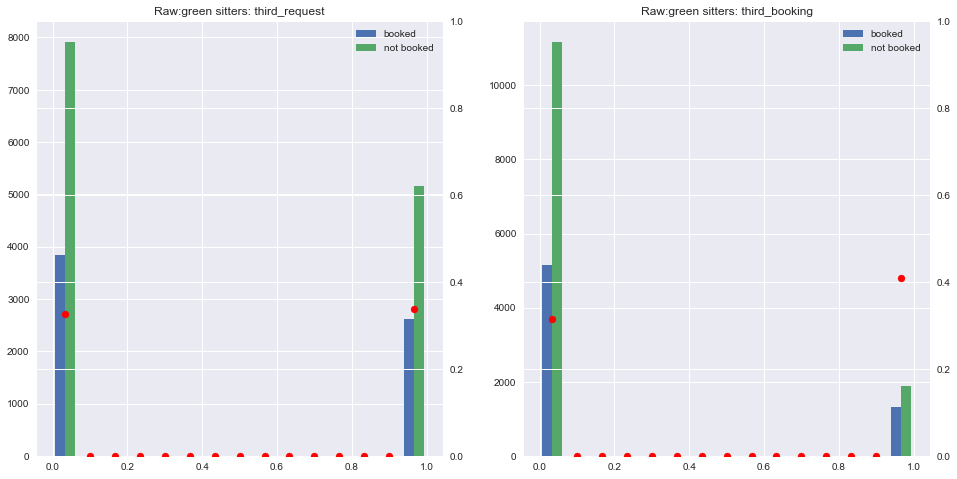

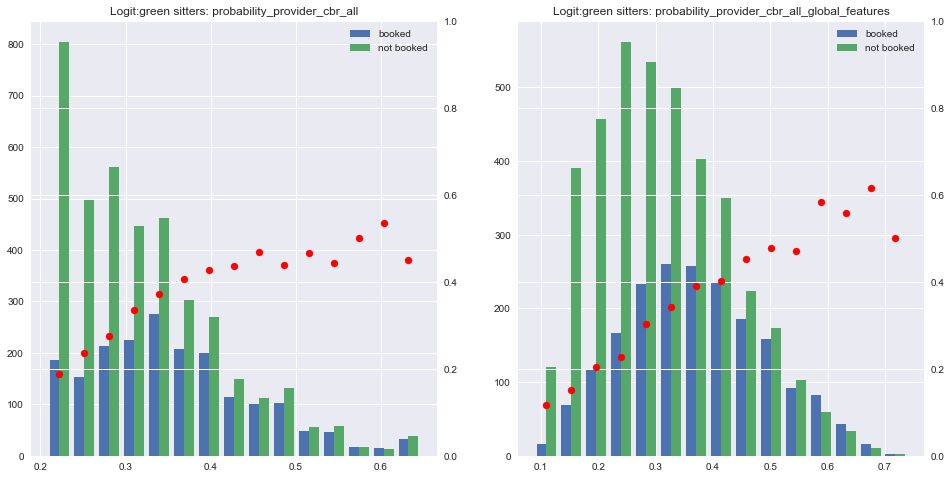

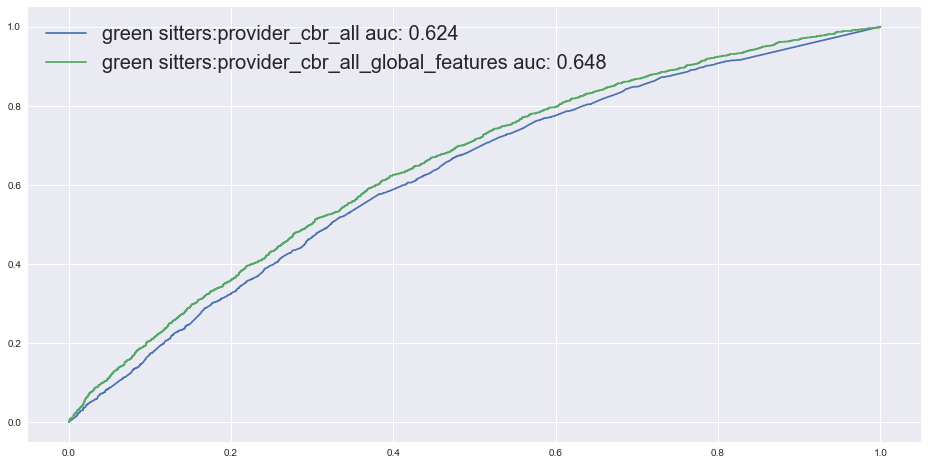

'===========red==========='

['provider_cbr_all',
 'avg_service_response_seconds_clipped',
 'avg_sitter_response_seconds_clipped',
 'calendar_recency_clipped',
 'rover_imported_ratio_x_cbr',
 'avg_image_resolution_clipped',
 'description_len_clipped',
 'first_booking',
 'second_booking',
 'first_request',
 'second_request',
 'third_booking',
 'third_request']

provider_cbr_all avg_service_response_seconds_clipped


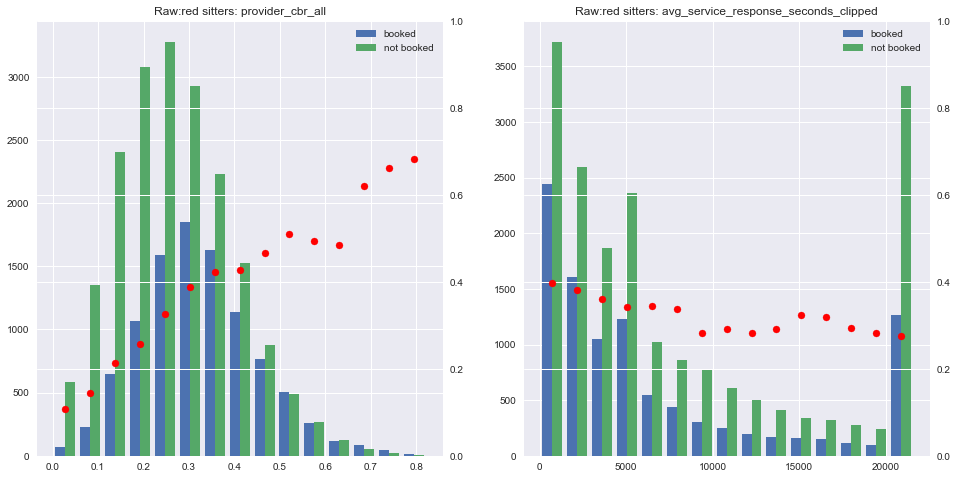

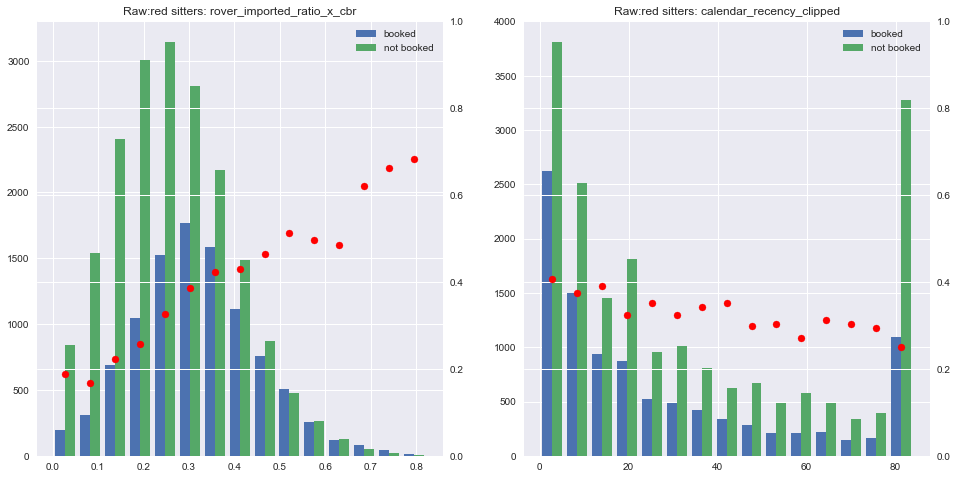

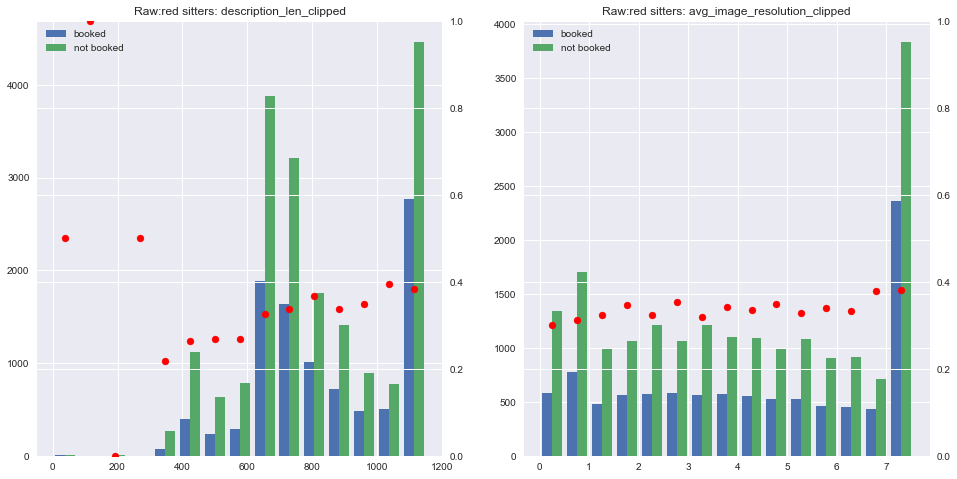

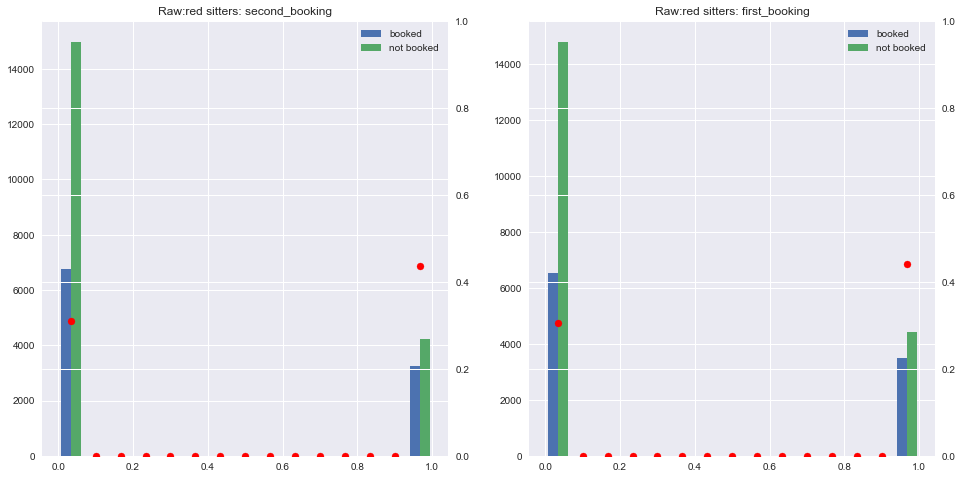

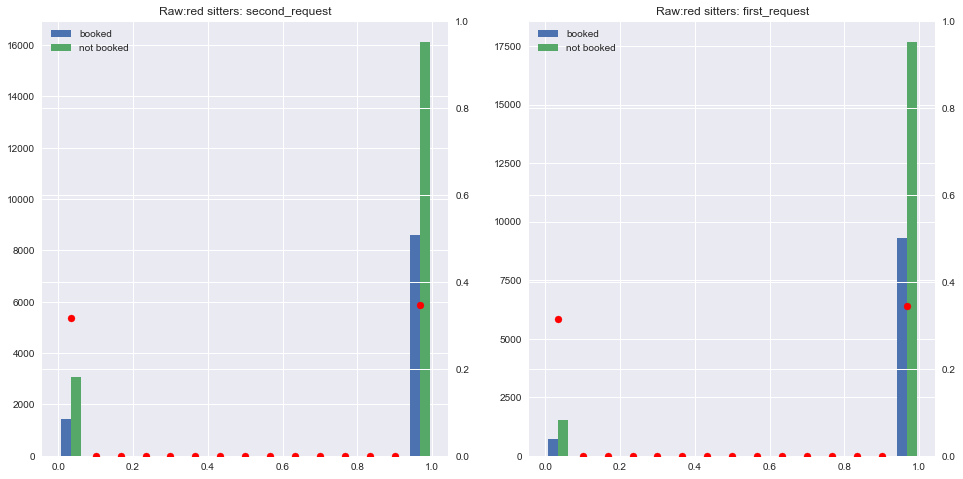

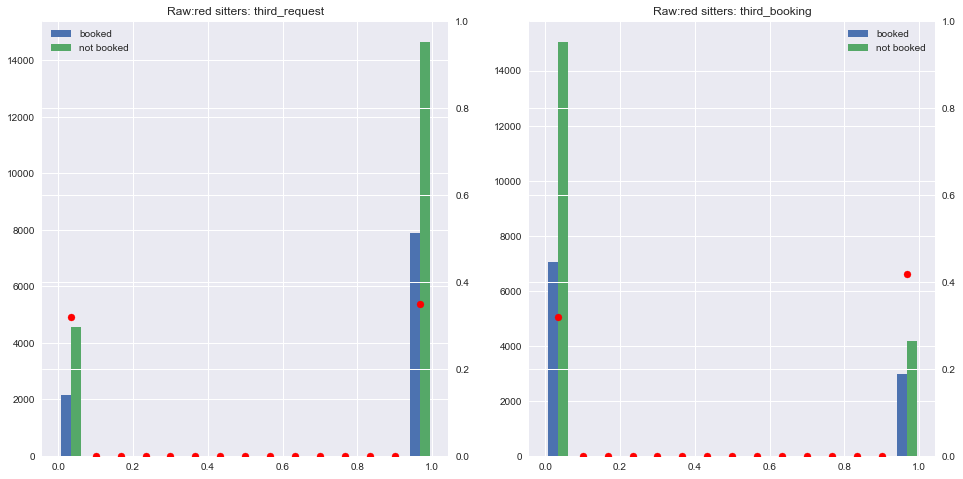

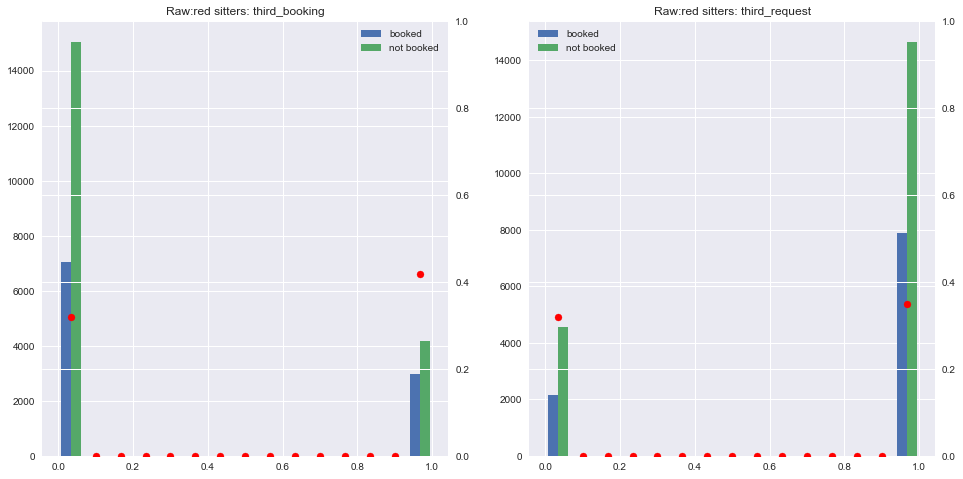

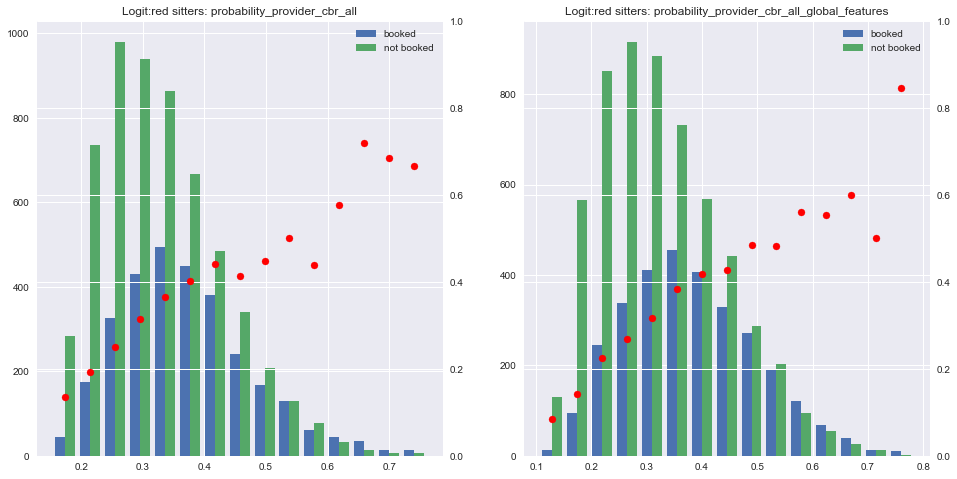

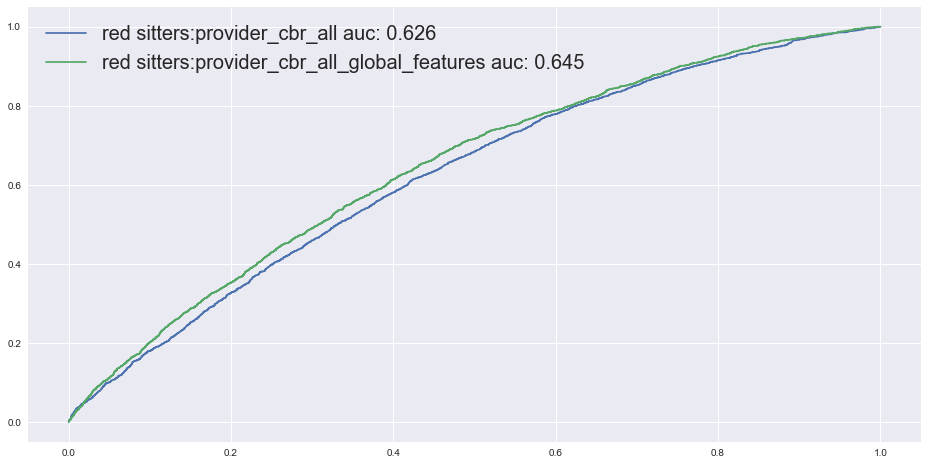

,auc,feature_name,status
1,0.652709,provider_cbr_all_global_features,seeding
0,0.571266,provider_cbr_all,seeding
1,0.648347,provider_cbr_all_global_features,green
0,0.623751,provider_cbr_all,green
1,0.645085,provider_cbr_all_global_features,red
0,0.626102,provider_cbr_all,red


In [23]:
from copy import deepcopy
from analytics_lib.compare_features import compare_features_disc_withlift_mul
df_auc_splittest = pd.DataFrame(columns=['status','feature_name','auc'])
df_predicted_splittest = pd.DataFrame(columns = ['status','booked','probability_provider_cbr_all','probability_provider_cbr_all_global_features'])
for status in ['seeding','green','red']:
    display('===========' + status + '===========')
    fea_col_list = list(deepcopy(feature_init[status]))
    display(fea_col_list)
    if 'provider_cbr_all' in fea_col_list:
        fea_col_list.remove('provider_cbr_all')
    sub_df_auc, lift, sub_df_predicted = compare_features_disc_withlift_mul(ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status==status],base_col='provider_cbr_all',fea_col_list=fea_col_list,fig_name=status+' sitters')
    sub_df_auc['status'] = status
    sub_df_predicted['status'] = status
    df_auc_splittest = df_auc_splittest.append(sub_df_auc)
    df_predicted_splittest = df_predicted_splittest.append(sub_df_predicted)
display(df_auc_splittest)


In [24]:
# evaluate the Logistic Regression model by splitting into train and test sets
def EvalLRModel(X,y,plot_name,penalty='l1',class_weight=None,no_bin=None,ylim=None):
    import analytics_lib
    from analytics_lib.Bucket_BR_Plot import Bucket_BR_Plot
    from sklearn.linear_model import LogisticRegression
    from sklearn.cross_validation import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20,stratify=y)
    model2 = LogisticRegression(penalty=penalty,class_weight=class_weight)
    model2.fit(X_train, y_train)
    
    if no_bin is None:
        no_bin = 15
    # predict class labels for the test set
    predicted = model2.predict(X_test)

    # generate class probabilities
    
    probs = model2.predict_proba(X_test)
    y_predicted_df = pd.concat([y_test,probs[:,1],predicted])
    y_predicted_df.columns = ['actural','predicted_probability','predicted']
    df=pd.DataFrame(probs[:,1])
    df = df.join(y_test.reset_index(drop=True))
    df.columns = ['probability','booked']
    h = Bucket_BR_Plot(df,'probability','booked',no_bin,plot_name, ylim) 
    
    fpr, tpr, _ = metrics.roc_curve(y_test, probs[:,1])
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    plt.plot(df.fpr,df.tpr)
    plt.title(os.path.basename(plot_name).replace('.png','_ROC'))
    auc = metrics.roc_auc_score(y_test, probs[:,1])
    plt.text(0.5, 0.5,'roc auc is '+ str(auc),
     horizontalalignment='left',
     verticalalignment='center',
     )
    plt.show()
    
    print 'roc auc is ', metrics.roc_auc_score(y_test, probs[:,1])
    
    print metrics.classification_report(y_test, predicted)
    
    return auc,y_predicted_df


## Use logistic regression for further grooming with l1 penalty

In [25]:
def display_model_coef(feature_name, model,display_switch=True):
    from IPython.display import display,HTML

    list1 = ['intercept']+feature_name
    list2 = list(model.intercept_) + list(model.coef_[0])
    df = pd.DataFrame(zip(list1,list2))
    if (display_switch == True):
        display(HTML(df.to_html(index=False)))
    return df

In [26]:
feature_final = {'seeding':[],'green':[],'red':[]}
from copy import deepcopy
from sklearn.feature_selection import SelectFromModel
for status in ['red','green','seeding']:

    feature_col = deepcopy(list(feature_init[status]))
    X = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status][feature_col]
    Y = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status].booked
    model = LogisticRegression(penalty='l1',class_weight=None)
    model.fit(X,Y)

    fea_col_groomed = deepcopy(feature_col)
    for i,ele in enumerate(model.coef_[0]):
        if abs(ele) < 0.000000001e-5:
            display('getting rid of '+feature_col[i])
            fea_col_groomed.remove(fea_col_groomed[i])

    model2 = SelectFromModel(model, prefit=True)
    X_new = model.transform(X)
    model.fit(X_new,Y)

    print '===================' + status + '==================='
    display_model_coef(fea_col_groomed,model)
    feature_final[status] = fea_col_groomed  

/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


===================red===================


0,1
intercept,-1.634828
provider_cbr_all,2.674343
avg_service_response_seconds_clipped,-0.003139
avg_sitter_response_seconds_clipped,-0.010451
calendar_recency_clipped,0.017238
rover_imported_ratio_x_cbr,0.000335
avg_image_resolution_clipped,0.338462
description_len_clipped,0.288627
first_booking,-0.141773
second_booking,-0.077574


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


===================green===================


0,1
intercept,-1.375312
avg_sitter_response_seconds_clipped,-0.008866
avg_service_response_seconds_clipped,0.006264
calendar_recency_clipped,0.000447
avg_image_resolution_clipped,0.706891
description_len_clipped,0.549644
rover_imported_ratio_x_cbr,0.000212
provider_cbr_all,0.001606
avg_testimonial_len_clipped,0.017592
years_of_experience_clipped,0.295006


===================seeding===================


/Users/wendyshi/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0,1
intercept,-0.932998
avg_sitter_response_seconds_clipped,-0.000017
avg_image_resolution_clipped,0.011732
description_len_clipped,0.000459
calendar_recency_clipped,-0.015814
avg_service_response_seconds_clipped,0.000624
avg_testimonial_len_clipped,-0.003499
years_of_experience_clipped,0.027759
num_images_clipped,0.371955
first_booking,0.209721


In [27]:
color_dict = {'seeding':'black','green':'green','red':'red'}
from sklearn.externals import joblib

predicted_br = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked','provider_cbr_all'])
from sklearn.feature_selection import SelectFromModel
for status in ['seeding','green','red']:
    model_name = os.path.join(data_dir,slug+'_'+status+'_model.pkl')

    fea = list(feature_final[status])
    X = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status]
    Y = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status].booked
    fea_df = X.copy()

    fea_file_name = os.path.join(data_dir,status+'_features_predicted_booking_rate_'+slug+'.csv')
    model_file_name = os.path.join(data_dir,'model_predicted_booking_rate_'+slug+'_'+status+'.csv')
    model = LogisticRegression(penalty='l1')
    
    if (reset_switch == False):
        display('loading model')
        model = joblib.load(model_name)
    else:
        display('fitting model')
        model.fit(X[fea],Y)
        display('saving model')
        joblib.dump(model,model_name, compress=('zlib', 9))
    
    sub = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked'])
    sub['conversation_id'] = X['conversation_id']
    sub['global_booking_rate'] = model.predict_proba(X[fea])[:,1]
    sub['status'] = status
    sub['booked'] = Y
    fea_df =  X.copy()
    predicted_br = predicted_br.append(sub)
    print '===================' + status + '==================='
    fea_df.to_csv(fea_file_name)
    
    coef_df = display_model_coef(fea,model)
    coef_df.to_csv(model_file_name,header=False,index=False)

predicted_br.to_csv(os.path.join(data_dir,'predicted_booking_rate_'+slug+'.csv')) 

'fitting model'

'saving model'

===================seeding===================


0,1
intercept,-0.929063
avg_sitter_response_seconds_clipped,-0.000018
avg_image_resolution_clipped,0.011666
description_len_clipped,0.000456
calendar_recency_clipped,-0.015831
avg_service_response_seconds_clipped,0.000003
avg_testimonial_len_clipped,0.000624
years_of_experience_clipped,-0.003498
num_images_clipped,0.027748
first_booking,0.374533


'fitting model'

'saving model'

===================green===================


0,1
intercept,-1.224237
avg_sitter_response_seconds_clipped,-0.000009
avg_service_response_seconds_clipped,-0.000004
calendar_recency_clipped,-0.008743
avg_image_resolution_clipped,0.005227
description_len_clipped,0.000429
rover_imported_ratio_x_cbr,1.029364
provider_cbr_all,0.123899
avg_testimonial_len_clipped,0.000202
years_of_experience_clipped,0.001448


'fitting model'

'saving model'

===================red===================


0,1
intercept,-1.522031
provider_cbr_all,2.592523
avg_service_response_seconds_clipped,-0.000010
avg_sitter_response_seconds_clipped,-0.000003
calendar_recency_clipped,-0.003059
rover_imported_ratio_x_cbr,-0.084697
avg_image_resolution_clipped,0.015703
description_len_clipped,0.000338
first_booking,0.331356
second_booking,0.282084


In [28]:
color_dict = {'seeding':'black','green':'green','red':'red'}
from sklearn.externals import joblib

predicted_br = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked','provider_cbr_all'])
from sklearn.feature_selection import SelectFromModel
for status in ['seeding','green','red']:
    model_name = os.path.join(data_dir,slug+'_'+status+'_model.pkl')

    fea = list(feature_final[status])
    X = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status]
    Y = ob_dummy_filled_bygroup_clipped[ob_dummy_filled_bygroup_clipped.status == status].booked
    fea_df = X.copy()

    fea_file_name = os.path.join(data_dir,status+'_features_predicted_booking_rate_'+slug+'.csv')
    model_file_name = os.path.join(data_dir,'model_predicted_booking_rate_'+slug+'_'+status+'.csv')
    model = LogisticRegression(penalty='l1')
    
    if (os.path.exists(model_name)):
        display('loading model')
        model = joblib.load(model_name)
    else:
        display('fitting model')
        model.fit(X[fea],Y)
        display('saving model')
        joblib.dump(model,model_name, compress=('zlib', 9))
    
    sub = pd.DataFrame(columns=['conversation_id','status','global_booking_rate','booked'])
    sub['conversation_id'] = X['conversation_id']
    sub['global_booking_rate'] = model.predict_proba(X[fea])[:,1]
    sub['status'] = status
    sub['booked'] = Y
    fea_df =  X.copy()
    predicted_br = predicted_br.append(sub)
    print '===================' + status + '==================='
    fea_df.to_csv(fea_file_name)
    
    coef_df = display_model_coef(fea,model)
    coef_df.to_csv(model_file_name,header=False,index=False)

predicted_br.to_csv(os.path.join(data_dir,'predicted_booking_rate_'+slug+'.csv')) 

'loading model'

===================seeding===================


0,1
intercept,-0.929063
avg_sitter_response_seconds_clipped,-0.000018
avg_image_resolution_clipped,0.011666
description_len_clipped,0.000456
calendar_recency_clipped,-0.015831
avg_service_response_seconds_clipped,0.000003
avg_testimonial_len_clipped,0.000624
years_of_experience_clipped,-0.003498
num_images_clipped,0.027748
first_booking,0.374533


'loading model'

===================green===================


0,1
intercept,-1.224237
avg_sitter_response_seconds_clipped,-0.000009
avg_service_response_seconds_clipped,-0.000004
calendar_recency_clipped,-0.008743
avg_image_resolution_clipped,0.005227
description_len_clipped,0.000429
rover_imported_ratio_x_cbr,1.029364
provider_cbr_all,0.123899
avg_testimonial_len_clipped,0.000202
years_of_experience_clipped,0.001448


'loading model'

===================red===================


0,1
intercept,-1.522031
provider_cbr_all,2.592523
avg_service_response_seconds_clipped,-0.000010
avg_sitter_response_seconds_clipped,-0.000003
calendar_recency_clipped,-0.003059
rover_imported_ratio_x_cbr,-0.084697
avg_image_resolution_clipped,0.015703
description_len_clipped,0.000338
first_booking,0.331356
second_booking,0.282084


In [29]:
predicted_br = predicted_br.drop('provider_cbr_all',axis=1).merge(ob[['conversation_id','provider_cbr_all','provider_type']],on='conversation_id')

In [30]:
predicted_br.groupby(['status'])[['global_booking_rate','provider_cbr_all','booked']].agg(['count','max','min','mean','median','std'])

global_booking_rate                                                    \
                      count       max       min      mean    median       std   
status                                                                          
green                 19521  0.746763  0.089982  0.330543  0.321098  0.118873   
red                   29239  0.797549  0.104409  0.342672  0.328521  0.117289   
seeding                9224  0.711602  0.077043  0.336783  0.345212  0.119359   

        provider_cbr_all                                               
                   count       max  min      mean    median       std  
status                                                                 
green              19521  0.980000  0.0  0.305435  0.287143  0.214949  
red                29239  0.822667  0.0  0.286394  0.277632  0.130944  
seeding             7803  0.980000  0.0  0.309897  0.000000  0.387188

In [31]:
predicted_br.groupby(['provider_type'])[['global_booking_rate','provider_cbr_all','booked']].agg(['count','max','min','mean','median','std'])

global_booking_rate                                \
                                  count       max       min      mean   
provider_type                                                           
merged                             3738  0.746763  0.113358  0.344836   
migrated                           2227  0.736677  0.106879  0.349589   
rover                             47116  0.797549  0.077043  0.338398   
rover-havent-merged                4903  0.762897  0.085178  0.319580   

                                        provider_cbr_all                       \
                       median       std            count   max  min      mean   
provider_type                                                                   
merged               0.334876  0.102038             3726  0.98  0.0  0.273189   
migrated             0.339775  0.106373             2200  0.98  0.0  0.283268   
rover                0.330481  0.119855            45772  0.98  0.0  0.302651   
rover-havent-merged  0.303122  0.117893             4865  0.98  0.0  0.259071   

                                         
                       median       std  
provider_type                            
merged               0.269957  0.118956  
migrated             0.275000  0.181196  
rover                0.280316  0.224725  
rover-havent-merged  0.244194  0.164375

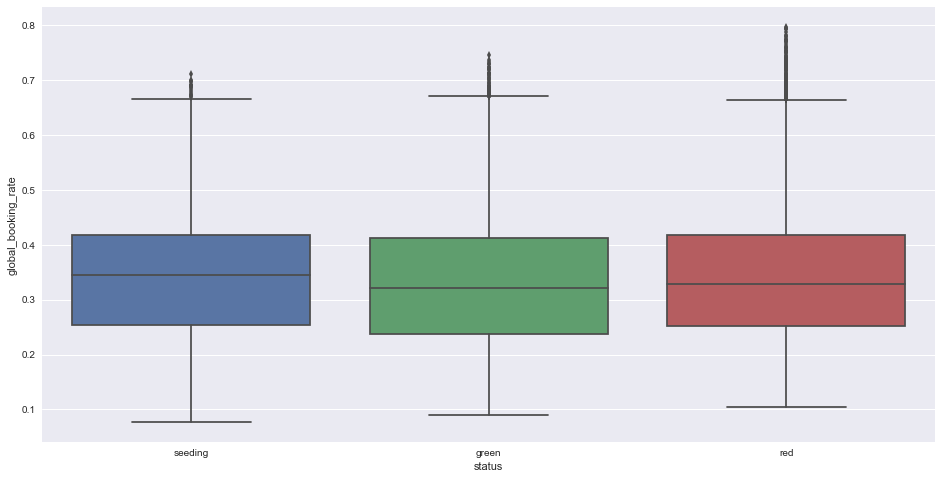

In [32]:
import seaborn as sns 
sns.boxplot(predicted_br['status'], predicted_br['global_booking_rate']) #Variable Plot
plt.show()

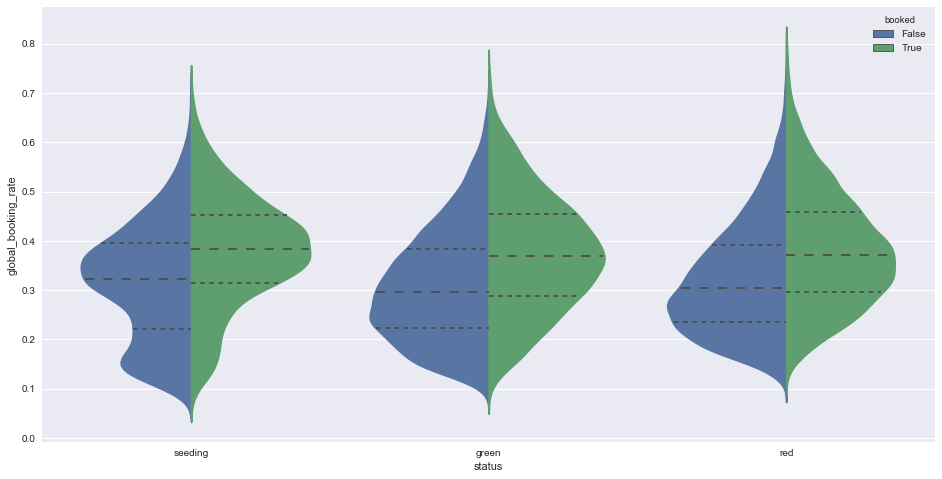

In [33]:
sns.violinplot(x='status', y ='global_booking_rate', hue="booked", data=predicted_br, split=True,
               inner="quart")
sns.despine(left=True)
plt.show()

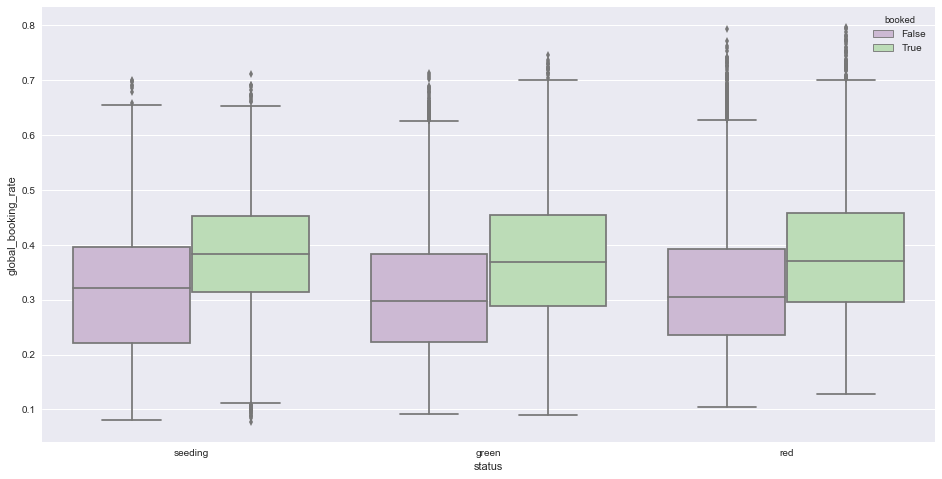

In [34]:
sns.boxplot(x='status', y ='global_booking_rate', hue="booked", data=predicted_br, palette="PRGn")
sns.despine(left=True)
plt.show()

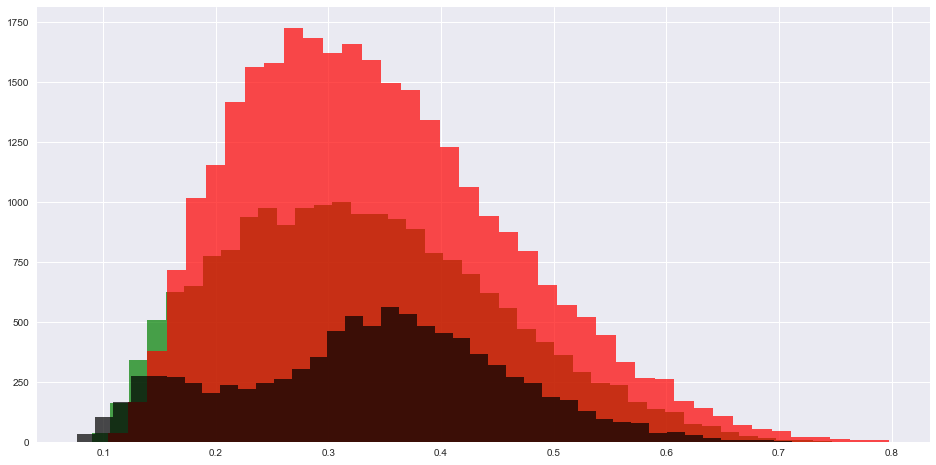

In [35]:
color_dict = {'seeding':'black','green':'green','red':'red'}
for status,color in color_dict.items():
    sub = predicted_br[predicted_br.status == status].global_booking_rate
    plt.hist(sub,normed=0,alpha=0.7,color=color,bins=40,histtype='bar', stacked=False)
plt.show()

In [36]:
sitter_global_training.service_type.unique()

array(['dog-walking', 'overnight-boarding', 'overnight-traveling',
       'drop-in', 'doggy-day-care'], dtype=object)